<a href="https://colab.research.google.com/github/wildhugecoconut/JBB-Nuclio-Capstone/blob/main/JBB_de_CAPSTONE_PROJECT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab

pd.set_option('display.max_columns', None)   # para visualizar mas columnas en un df

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_pickle("/content/drive/MyDrive/capstone igualdad de genero/12_09_23")

In [ ]:
df_pour=pd.read_pickle("/content/drive/MyDrive/capstone igualdad de genero/pic_de_pour")

In [ ]:
df

Region Tasa de empleo a tiempo completo (%, población 15+)  \
0     Austria                                                 43    
1     Belgium                                                 40    
2    Bulgaria                                                 46    
3      Cyprus                                                 49    
4     Czechia                                                 48    
..        ...                                                ...    
373  Portugal                                                 59    
374   Romania                                                 57    
375    Sweden                                                 64    
376  Slovenia                                                 59    
377  Slovakia                                                 58    

    Duration of working life (years, 15+ population)  \
0                                                 35   
1                                                 32   
2                                                 32   
3                                                 34   
4                                                 33   
..                                               ...   
373                                               39   
374                                               35   
375                                               42   
376                                               36   
377                                               35   

    Empleados en Educación, Salud y Actividades de Trabajo Social (%, empleados 15+)  \
0                                                   28                                 
1                                                   40                                 
2                                                   19                                 
3                                                   21                                 
4                                                   26                                 
..                                                 ...                                 
373                                                  6                                 
374                                                  4                                 
375                                                 11                                 
376                                                  5                                 
377                                                  4                                 

    Capacidad para tomar 1h o 2h libres durante las horas de trabajo para atender asuntos personales (%, trabajadores 15+)  \
0                                                   36                                                                       
1                                                   30                                                                       
2                                                   20                                                                       
3                                                   17                                                                       
4                                                   11                                                                       
..                                                 ...                                                                       
373                                                 28                                                                       
374                                                 20                                                                       
375                                                 47                                                                       
376                                                 32                                                                       
377                                                 15        

In [ ]:
del(df["% Personas por riesgo de pobreza_x"])
del(df["% Personas por riesgo de pobreza_y"])

In [ ]:
df_pour.rename(columns={"Date":"Fecha"},inplace=True)

In [ ]:
df_pour.rename(columns={"gender":"Género"},inplace=True)

In [ ]:
df_pour

Fecha % Personas por riesgo de pobreza          Region  Género
0     2008                              2.1         Belgium       0
1     2009                              3.0         Belgium       0
2     2010                              3.0         Belgium       0
3     2011                              3.6         Belgium       0
4     2012                              3.7         Belgium       0
..     ...                              ...             ...     ...
307   2016                              3.2  United Kingdom       1
308   2017                              3.4  United Kingdom       1
309   2018                              3.0  United Kingdom       1
310   2019                              2.3  United Kingdom       1
311   2020                              2.8  United Kingdom       1

[624 rows x 4 columns]

In [ ]:
df=pd.merge(df,df_pour,on=["Fecha","Region","Género"],how="left")

JAUME

In [ ]:
target = 'Género'
features = df.columns[df.columns!=target]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 377
Data columns (total 45 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Region                                                                                                                              378 non-null    object 
 1   Tasa de empleo a tiempo completo (%, población 15+)                                                                                 378 non-null    object 
 2   Duration of working life (years, 15+ population)                                                                                    378 non-null    object 
 3   Empleados en Educación, Salud y Actividades de Trabajo Social (%, empleados 15+)     

In [ ]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i" or dataset[i].dtype.kind=="b")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
l_num,l_bool,l_cat=obtener_lista_variables(df)

In [ ]:
l_num

['Fecha',
 'Homicidios',
 'Homicidios por familiares',
 'Suicidios',
 'Pareja con hijos Tiempo diario tareas domésticas antes y durante la pandemia (%)',
 'Soltero o conviviente único con hijos, tiempo diario tareas domésticas antes y durante la pandemia (%)',
 'Soltero sin hijos, tiempo diario tareas domésticas antes y durante la pandemia (%)']

In [ ]:
l_bool

[]

In [ ]:
l_cat

['Region',
 'Tasa de empleo a tiempo completo (%, población 15+)',
 'Duration of working life (years, 15+ population)',
 'Empleados en Educación, Salud y Actividades de Trabajo Social (%, empleados 15+)',
 'Capacidad para tomar 1h o 2h libres durante las horas de trabajo para atender asuntos personales (%, trabajadores 15+)',
 'Career Prospects Index (points, 0-100)',
 'Mean monthly earnings (PPS, working population)',
 'Mean equivalised net income (PPS, 16+ population)',
 'Tasa de riesgo de pobreza (%, población 16+)',
 'S20/S80 income quintile share (16+ population)',
 'Graduados de educación terciaria (%, población 15+)',
 'Personas participando en educación formal o no formal y capacitación (%, población 15+)',
 'Estudiantes terciarios en Educación, Salud, Bienestar, Humanidades y Arte (estudiantes terciarios) (%, población 15+)',
 'People caring for and educating their children or grandchildren, elderly or people with disabilities, every day (% 18+ population)',
 'Personas que coc

In [ ]:
l_cat=[
    'Tasa de empleo a tiempo completo (%, población 15+)',
    'Duration of working life (years, 15+ population)',
    'Empleados en Educación, Salud y Actividades de Trabajo Social (%, empleados 15+)',
    'Capacidad para tomar 1h o 2h libres durante las horas de trabajo para atender asuntos personales (%, trabajadores 15+)',
    'Career Prospects Index (points, 0-100)',
    'Mean monthly earnings (PPS, working population)',
    'Mean equivalised net income (PPS, 16+ population)',
    'Tasa de riesgo de pobreza (%, población 16+)',
    'S20/S80 income quintile share (16+ population)',
    'Graduados de educación terciaria (%, población 15+)',
    'Personas participando en educación formal o no formal y capacitación (%, población 15+)',
    'Estudiantes terciarios en Educación, Salud, Bienestar, Humanidades y Arte (estudiantes terciarios) (%, población 15+)',
    'People caring for and educating their children or grandchildren, elderly or people with disabilities, every day (% 18+ population)',
    'Personas que cocinan y/o realizan tareas domésticas todos los días (%, población 18+)',
    'Trabajadores que realizan actividades deportivas, culturales o de ocio fuera de su hogar, asiduamente (%, trabajadores 15+)',
    'Trabajadores involucrados en actividades voluntarias o benéficas, al menos una vez al mes (%, trabajadores 15+)',
    'Share of ministers (%)',
    'Share of members of parliament (%)',
    'Share of members of regional assemblies (%)',
    'Share of members of boards in largest quoted companies, supervisory board or board of directors (%)',
    'Share of board members of central bank (%)',
    'Share of board members of research funding organisations (%)',
    'Porcentaje de miembros de la junta de organizaciones de radiodifusión de propiedad pública (%)',
    'Share of members of highest decision making body of the national Olympic sport organisations (%)',
    'Salud autopercibida, buena o muy buena (%, población 16+)',
    'Life expectancy in absolute value at birth (years)',
    'Healthy life years in absolute value at birth (years)',
    'Personas que no fuman y no están involucradas en el consumo perjudicial de alcohol (%, población 16+)',
    'Personas que realizan actividades físicas y/o consumen frutas y verduras (%, población 16+)',
    'Población con necesidades insatisfechas de exámenes médicos (%, población 16+)',
    'Personas con necesidades insatisfechas de exámenes dentales (%, población 16+)',
    'Tasa suicidios',
    'Tasa de Paro en personas menores de 25 años',
    'Tasa de Paro en personas de 25 y más años',
    '% Tribunales supremos presidentes y miembros',
    '% Personas por riesgo de pobreza_x',
    '% Personas por riesgo de pobreza_y'
]

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 377
Data columns (total 45 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Region                                                                                                                              378 non-null    object 
 1   Tasa de empleo a tiempo completo (%, población 15+)                                                                                 378 non-null    int64  
 2   Duration of working life (years, 15+ population)                                                                                    378 non-null    int64  
 3   Empleados en Educación, Salud y Actividades de Trabajo Social (%, empleados 15+)     

In [ ]:
for i in l_cat:
  if i in df:
    df[i+"__"]=df[i].astype(float)

EDA: Analisis Exploratorio

In [ ]:
df.head()

Region  Tasa de empleo a tiempo completo (%, población 15+)  \
0   Austria                                                 43     
1   Belgium                                                 40     
2  Bulgaria                                                 46     
3    Cyprus                                                 49     
4   Czechia                                                 48     

   Duration of working life (years, 15+ population)  \
0                                                35   
1                                                32   
2                                                32   
3                                                34   
4                                                33   

   Empleados en Educación, Salud y Actividades de Trabajo Social (%, empleados 15+)  \
0                                                 28                                  
1                                                 40                                  
2                                                 19                                  
3                                                 21                                  
4                                                 26                                  

   Capacidad para tomar 1h o 2h libres durante las horas de trabajo para atender asuntos personales (%, trabajadores 15+)  \
0                                                 36                                                                        
1                                                 30                                                                        
2                                                 20                                                                        
3                                                 17                                                                        
4                                                 11                                                                        

   Career Prospects Index (points, 0-100)  \
0                                      64   
1                                      66   
2                                      66   
3                                      53   
4                                      61   

   Mean monthly earnings (PPS, working population)  \
0                                             2343   
1                                             2778   
2                                             1078   
3                                             1941   
4                                             1463   

   Mean equivalised net income (PPS, 16+ population)  \
0                                              26051   
1                                              23537   
2                                              10935   
3                                              21096   
4                                              15359   

   Tasa de riesgo de pobreza (%, población 16+)  \
0                                            14   
1                                            15   
2                                            25   
3                                            15   
4                                            12   

   S20/S80 income quintile share (16+ population)  \
0                                              25   
1                                              28   
2                                              13   
3                                              23   
4                                              29   

   Graduados de educación terciaria (%, población 15+)  \
0                                                 27     
1                                                 36     
2                                                 27     
3                                                 38     
4                                                 21     

   Personas participando en educación formal o no formal y capacitación (%, poblaci

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 377
Data columns (total 80 columns):
 #   Column                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                --------------  -----  
 0   Region                                                                                                                                378 non-null    object 
 1   Tasa de empleo a tiempo completo (%, población 15+)                                                                                   378 non-null    int64  
 2   Duration of working life (years, 15+ population)                                                                                      378 non-null    int64  
 3   Empleados en Educación, Salud y Actividades de Trabajo Social (%, empleados

Distribución del target

In [ ]:
df['Género'].value_counts()

1    189
0    189
Name: Género, dtype: int64

In [ ]:
target = 'Género'
features = df.columns[df.columns!=target]

array([[<Axes: title={'center': 'Género'}>]], dtype=object)

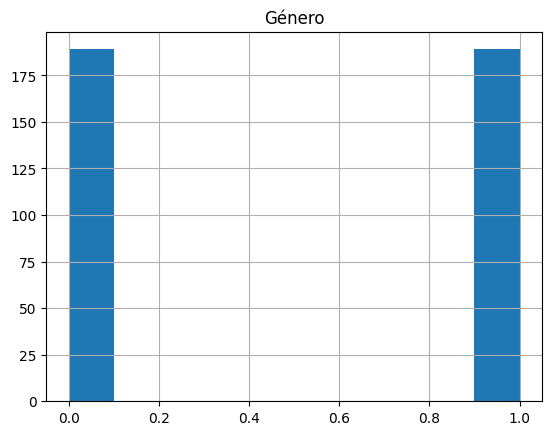

In [ ]:
df.hist('Género')

In [ ]:
proportion_gender = (df['Género'].value_counts()) / (len(df['Género'])) *100
proportion_gender

print(f'La cantidad de datos de mujeres y hombres de este DataFrame es proporcional')
print(f'{proportion_gender}')

La cantidad de datos de mujeres y hombres de este DataFrame es proporcional
1    50.0
0    50.0
Name: Género, dtype: float64


In [ ]:
df['Género']

0      1
1      1
2      1
3      1
4      1
      ..
373    0
374    0
375    0
376    0
377    0
Name: Género, Length: 378, dtype: int64

In [ ]:
X = df[features]

In [ ]:
y = df[target]

Analisis Univariable

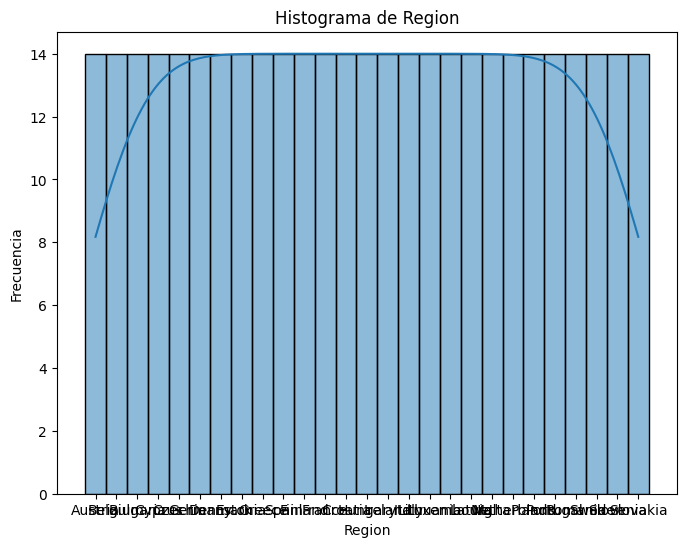

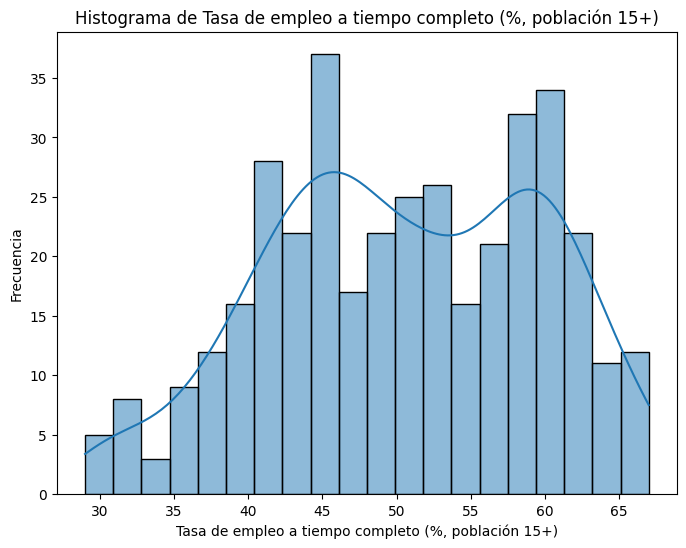

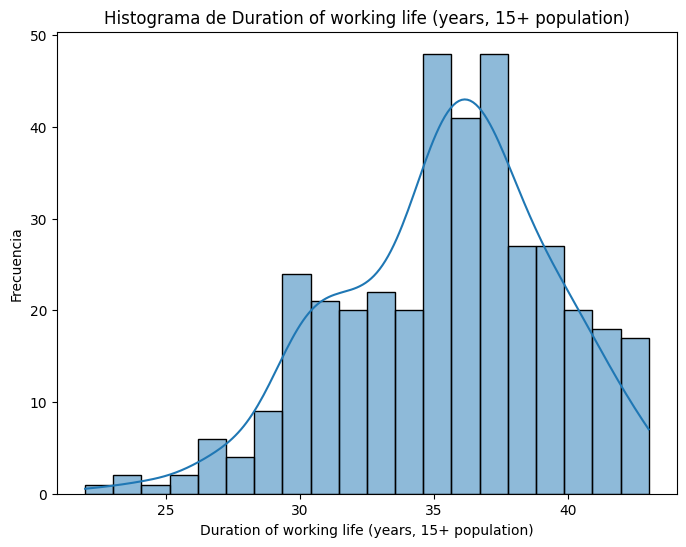

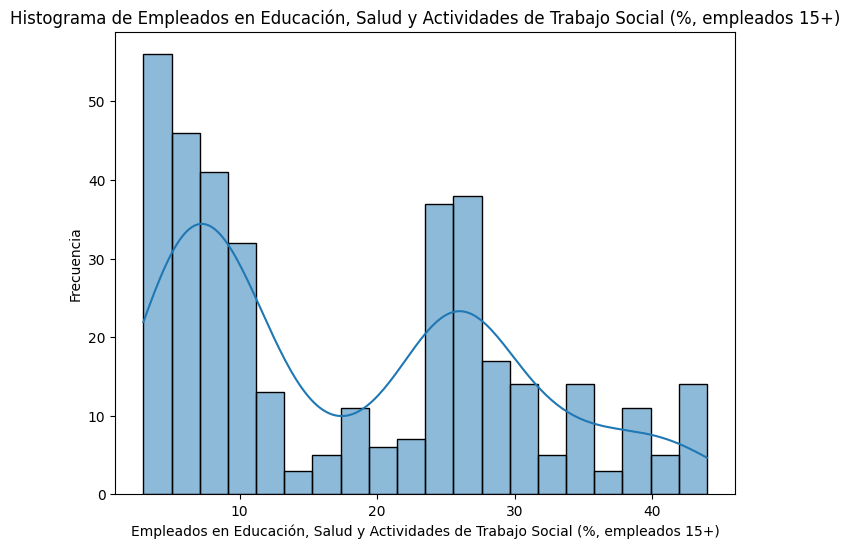

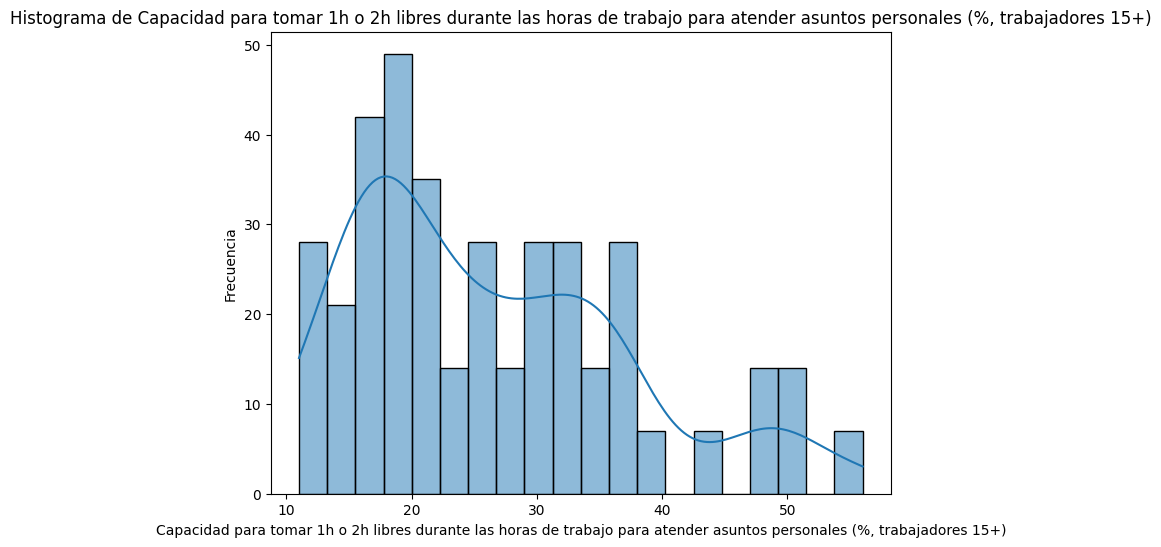

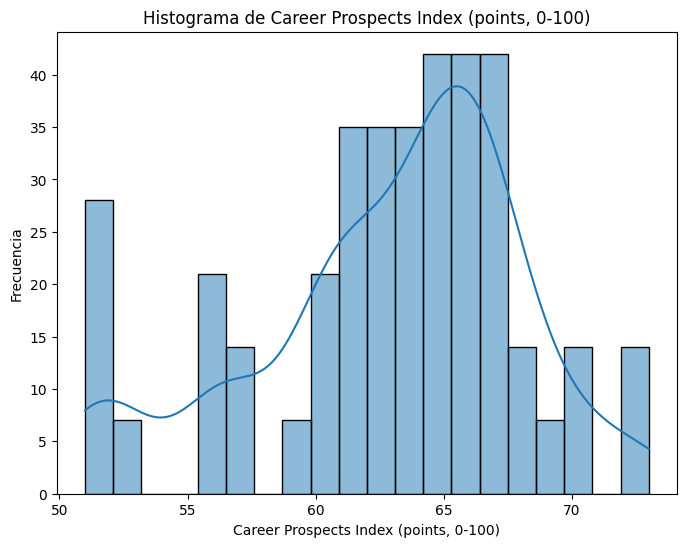

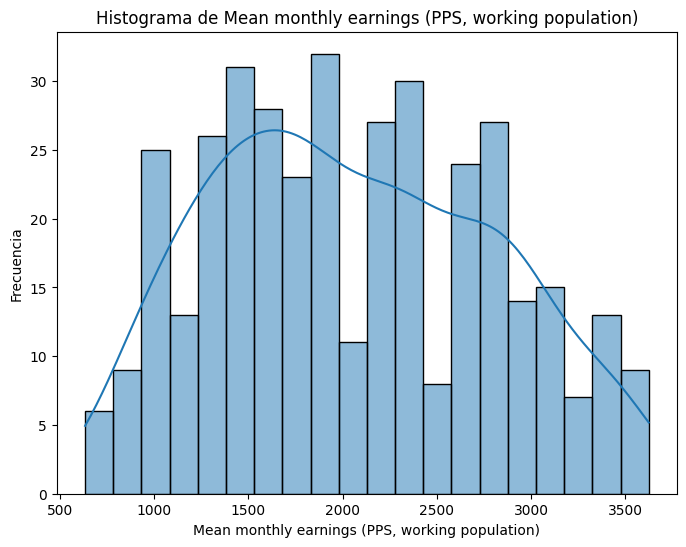

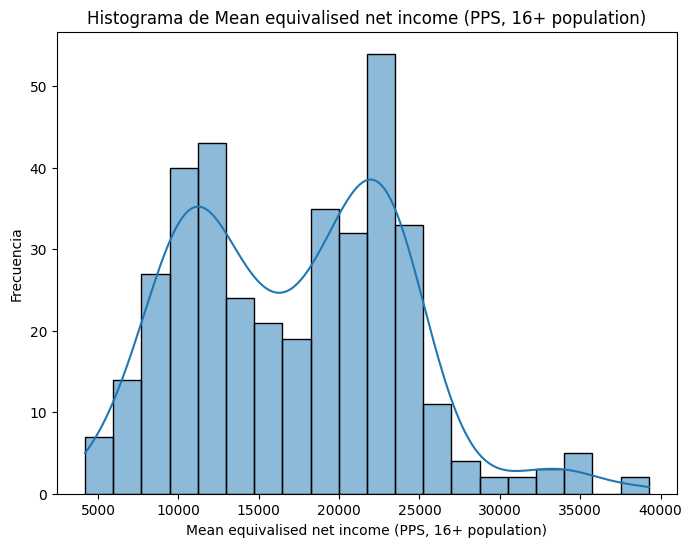

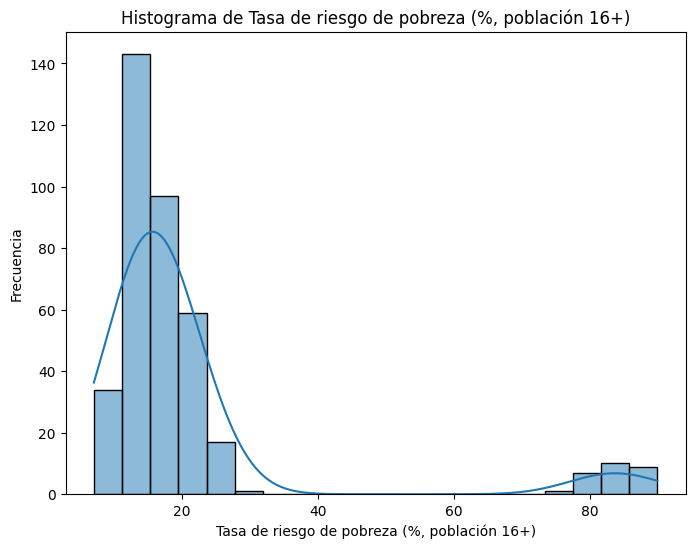

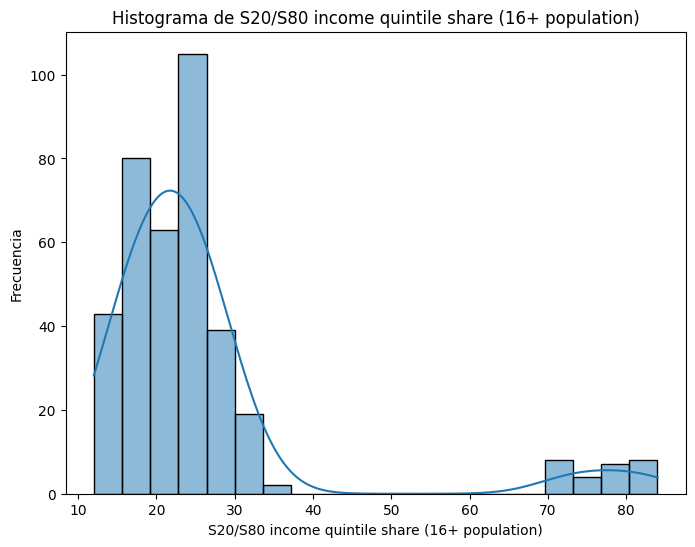

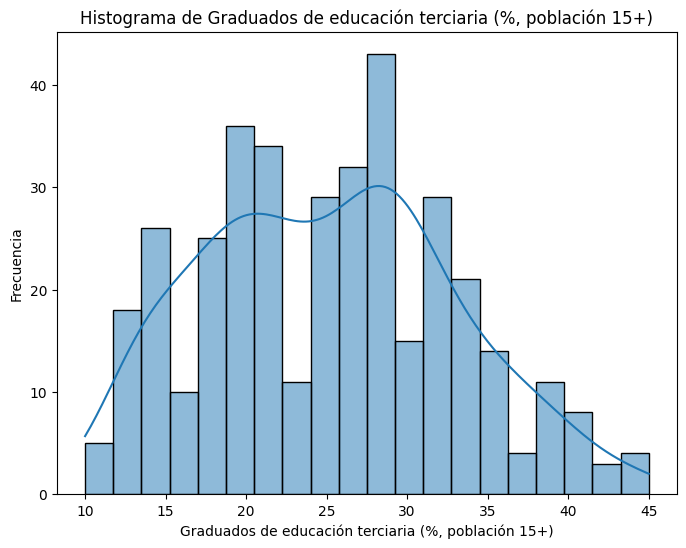

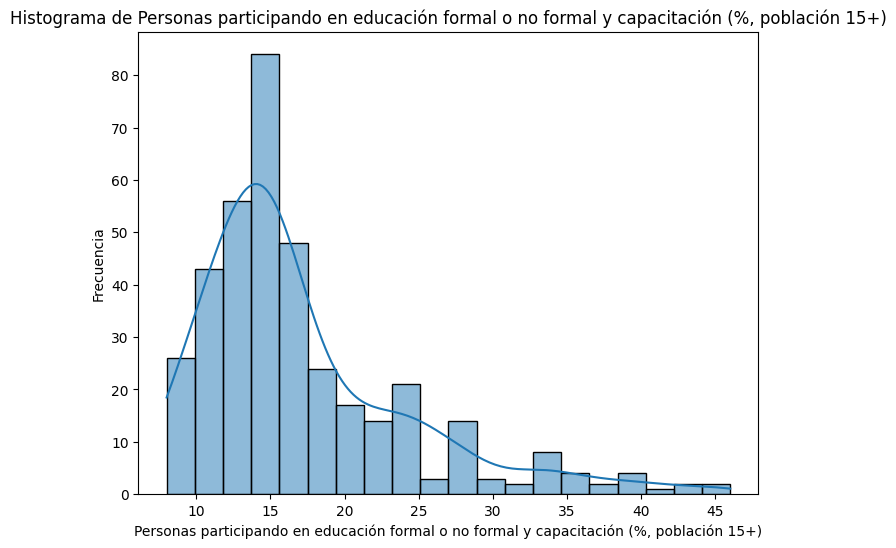

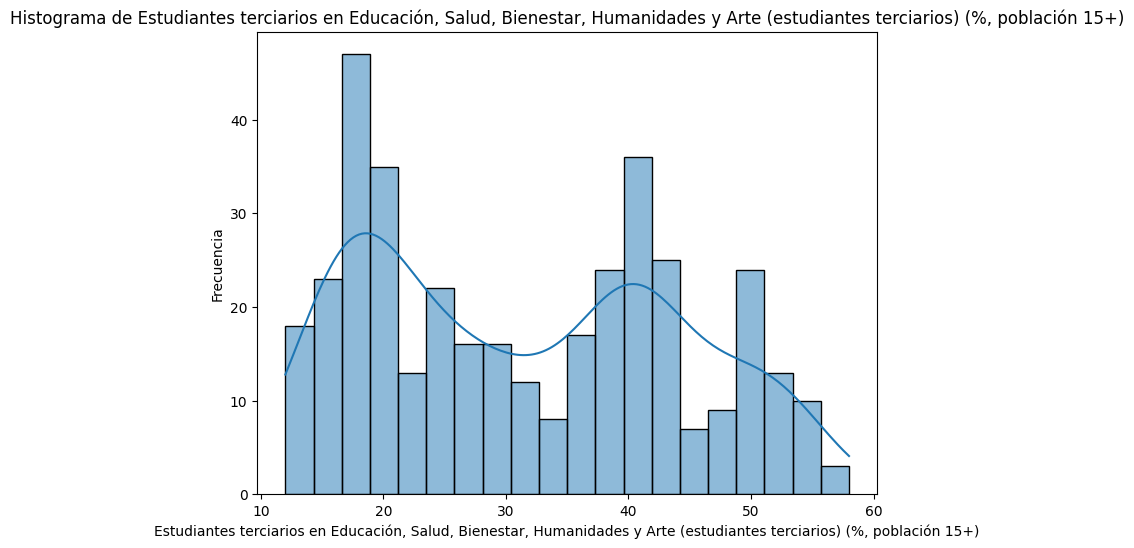

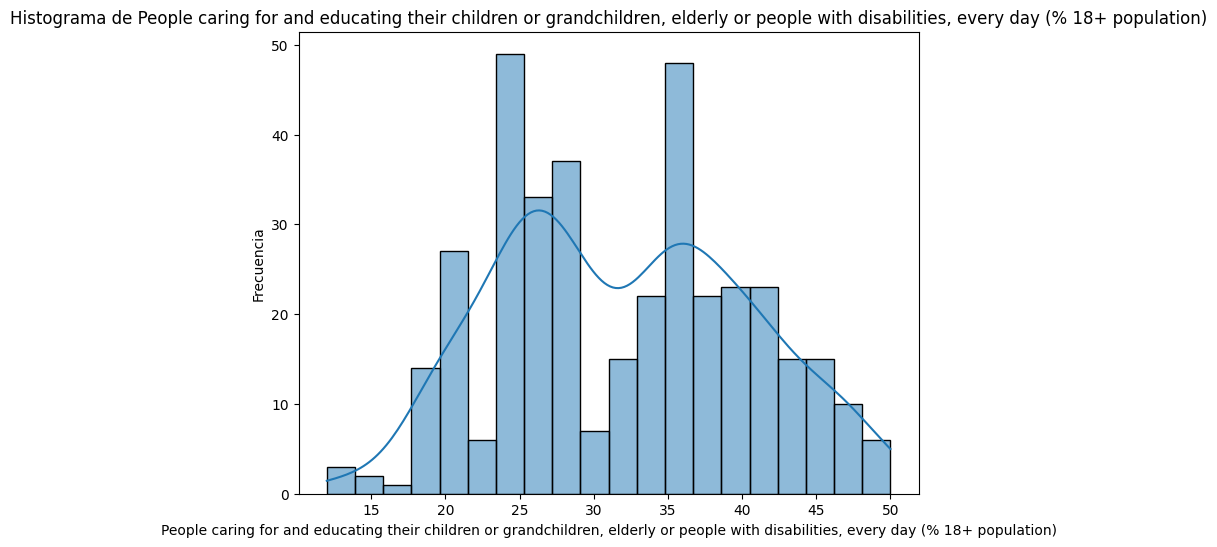

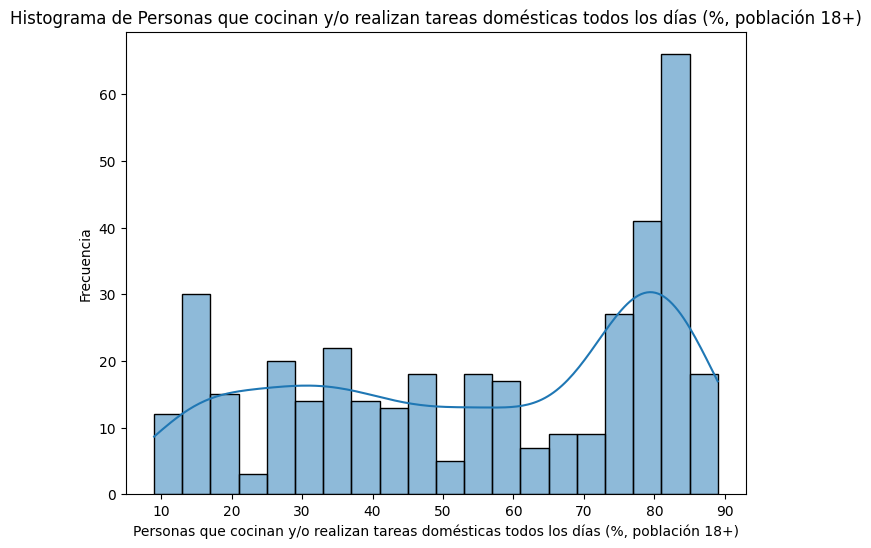

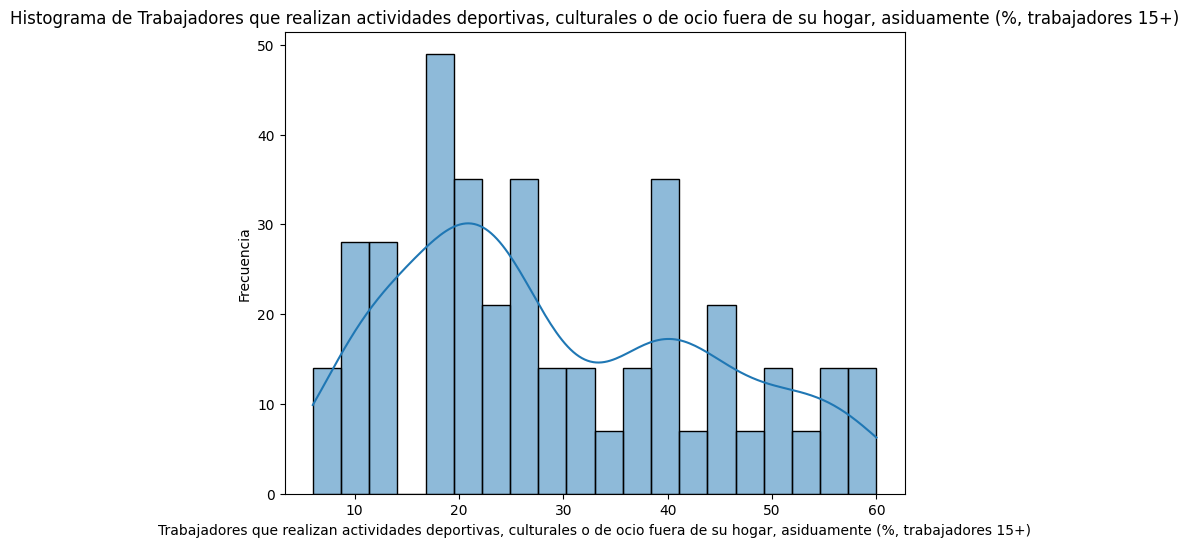

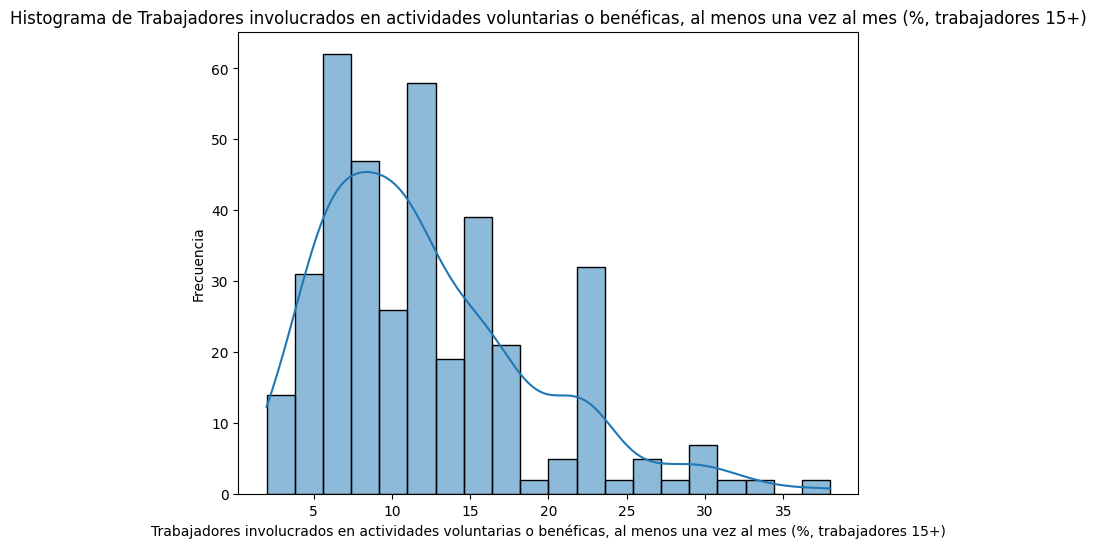

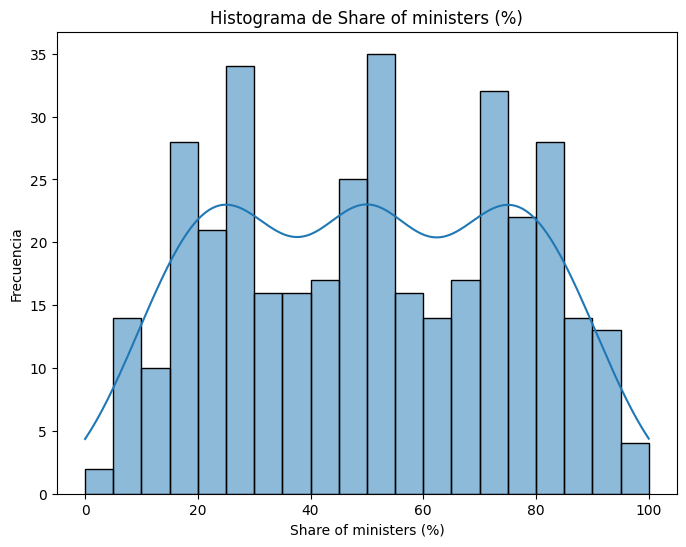

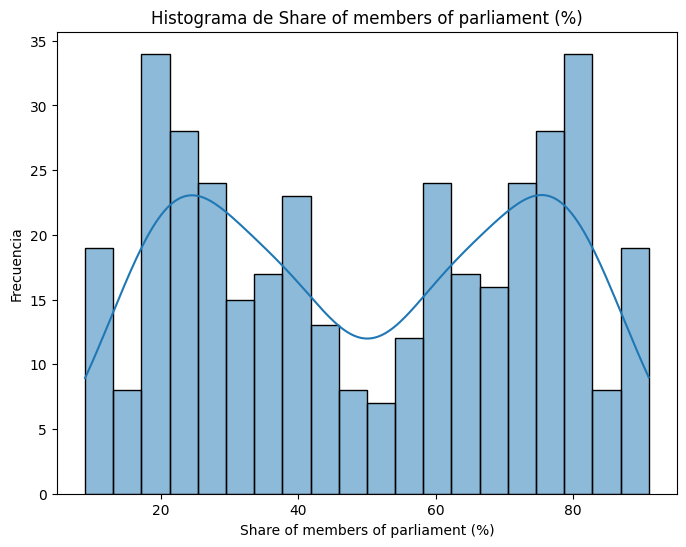

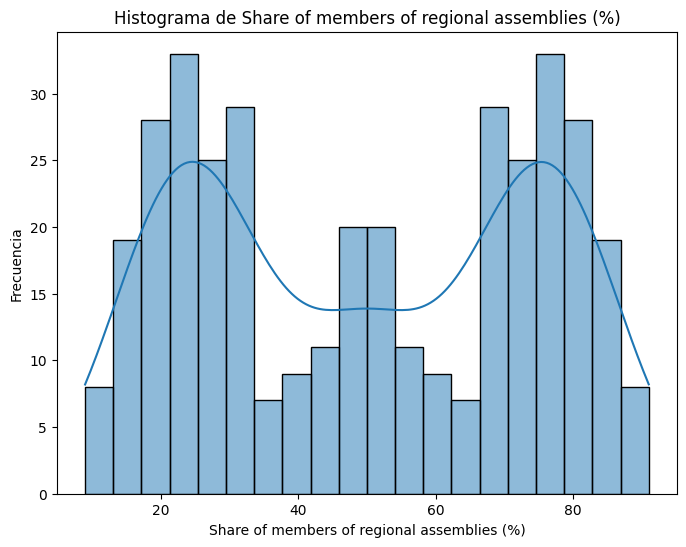

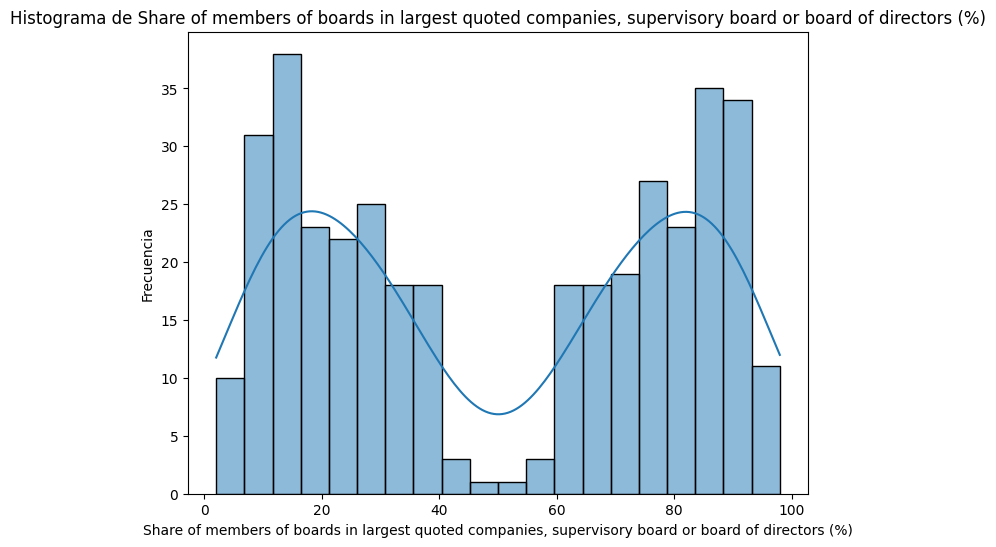

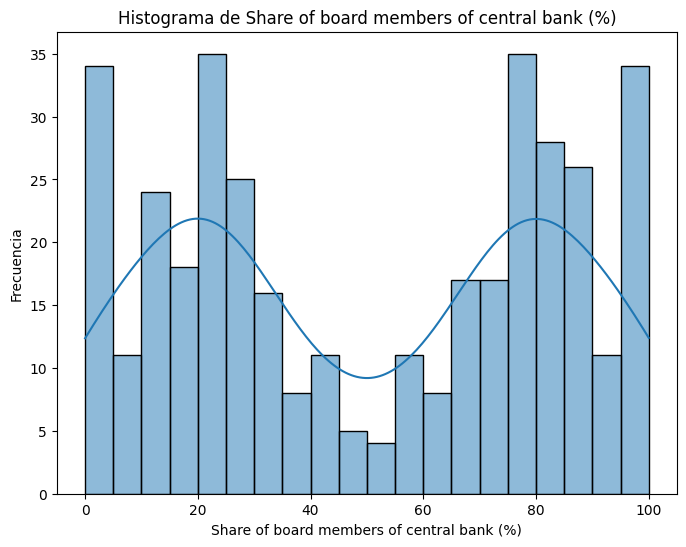

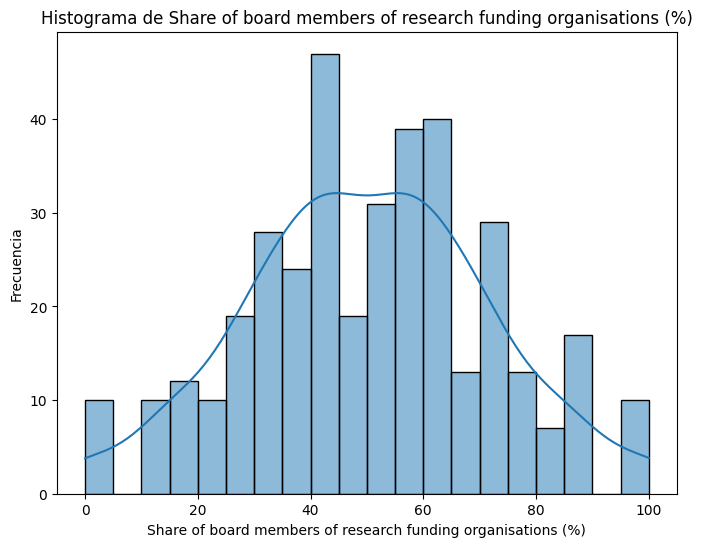

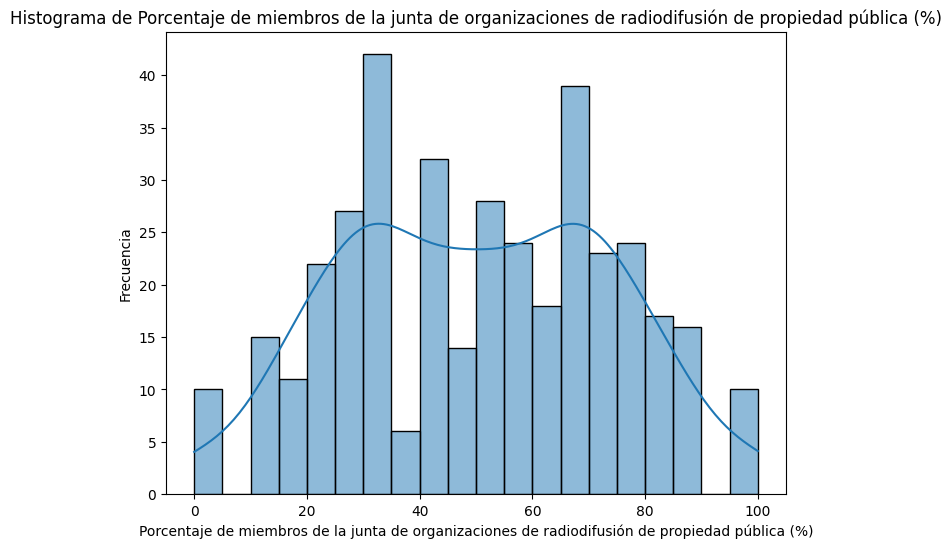

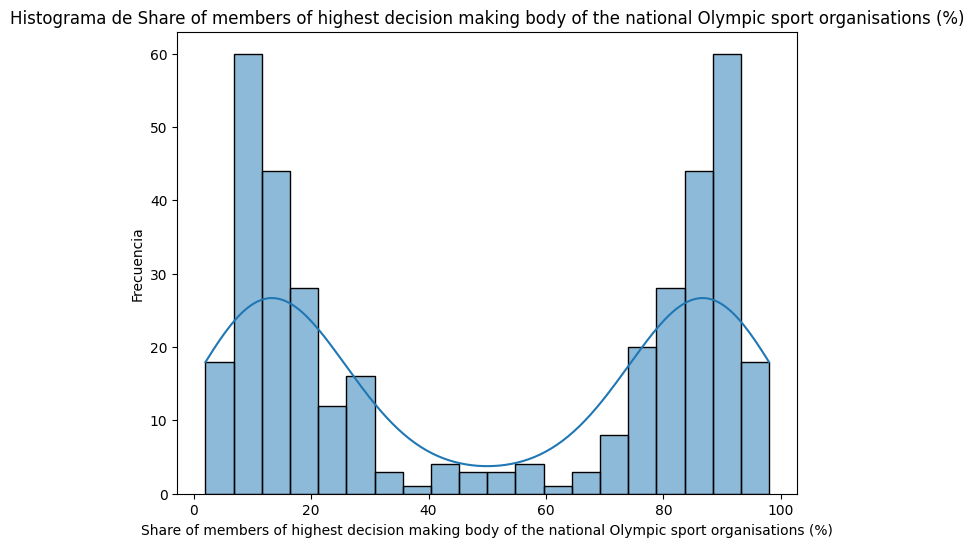

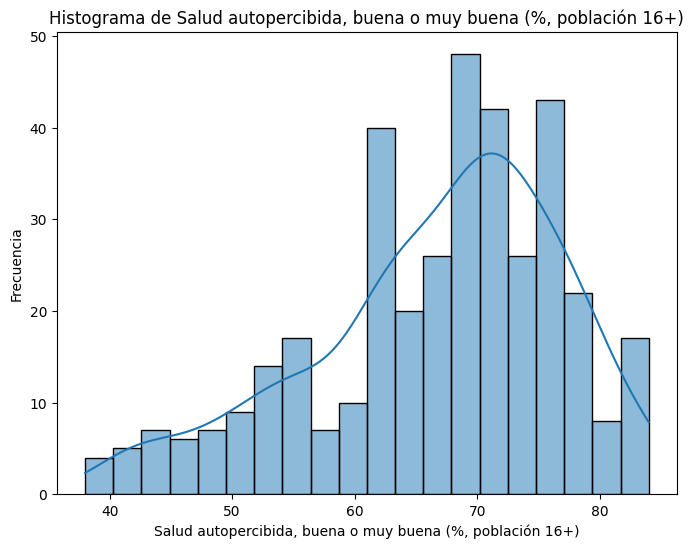

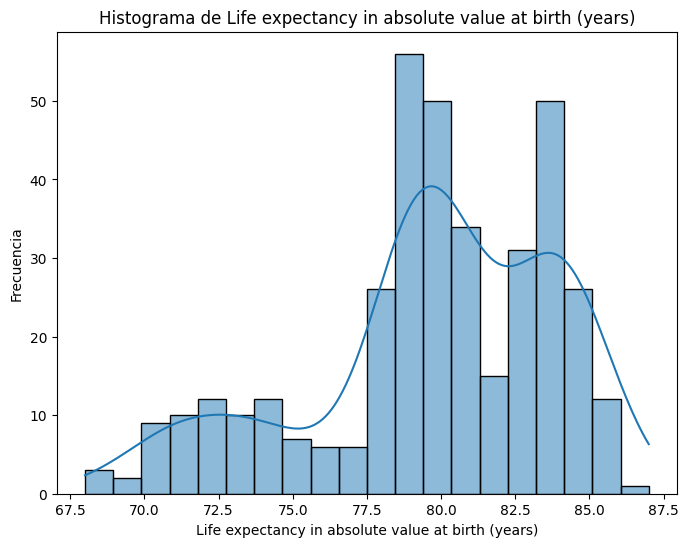

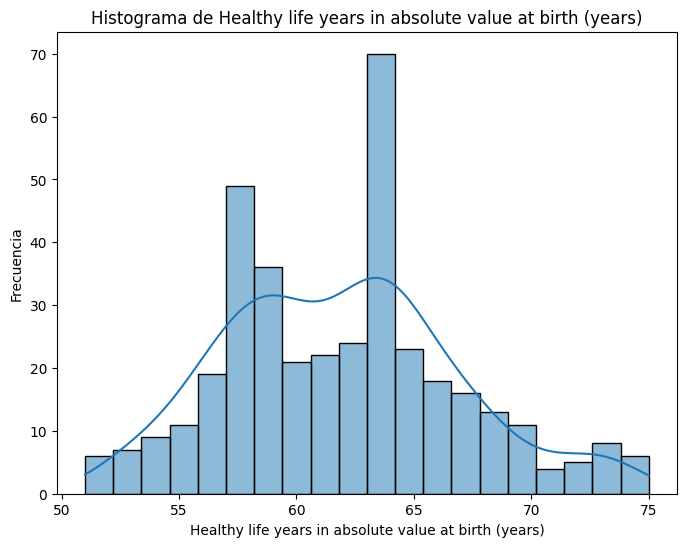

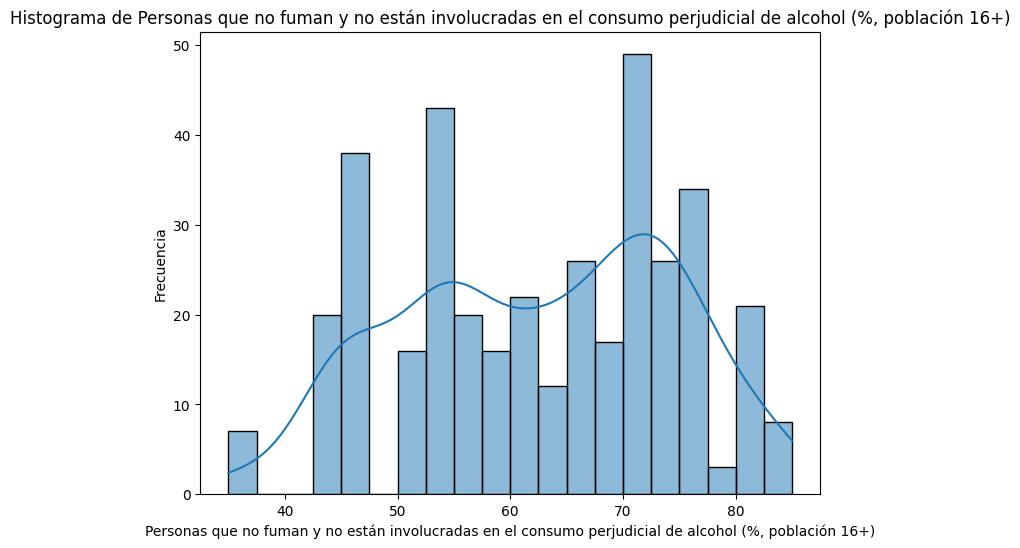

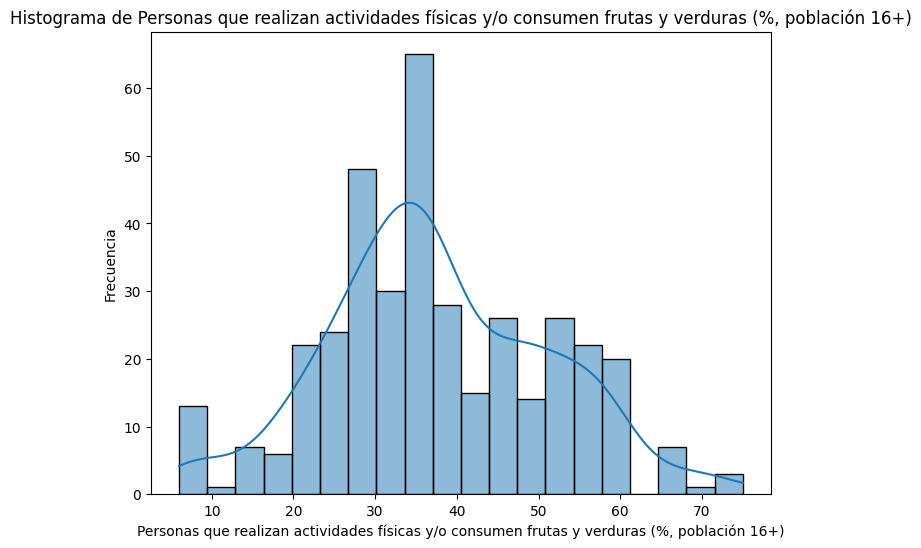

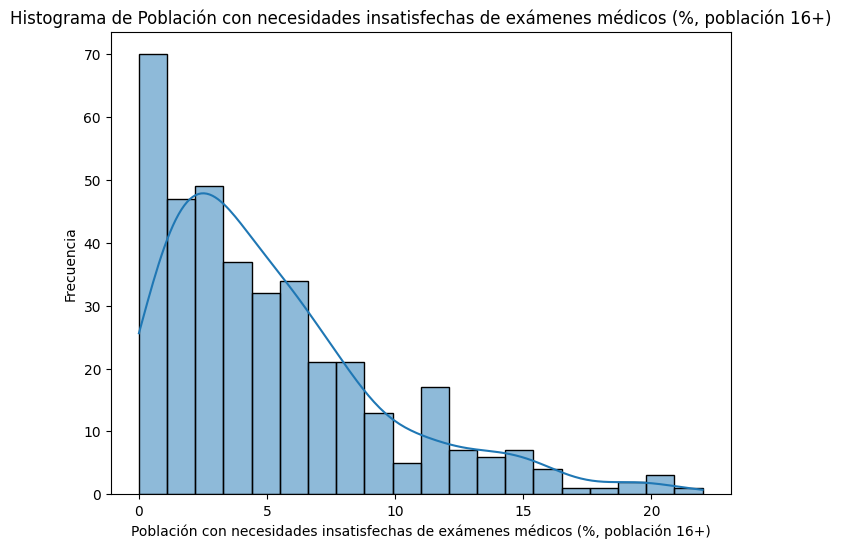

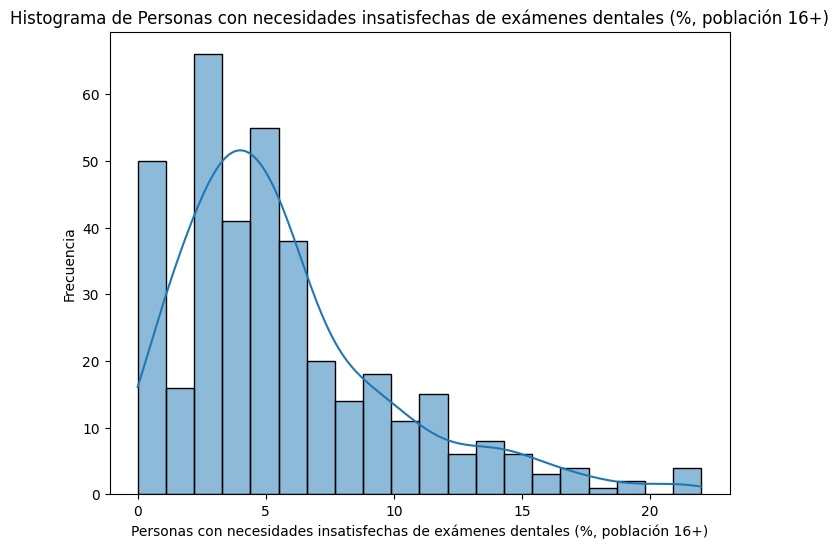

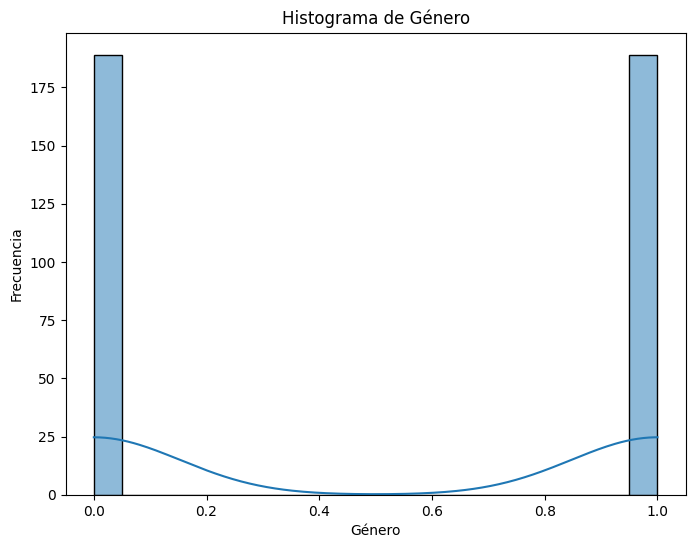

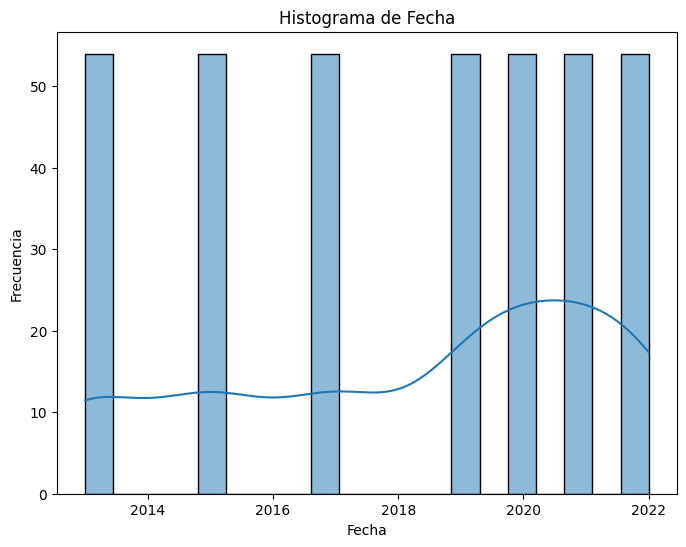

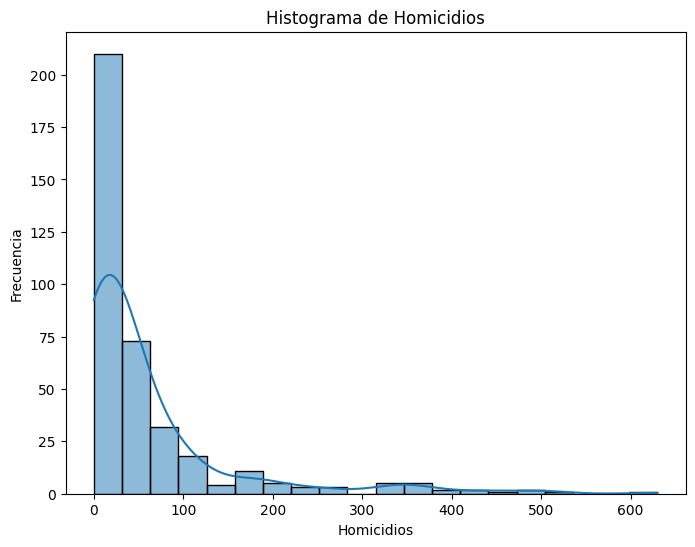

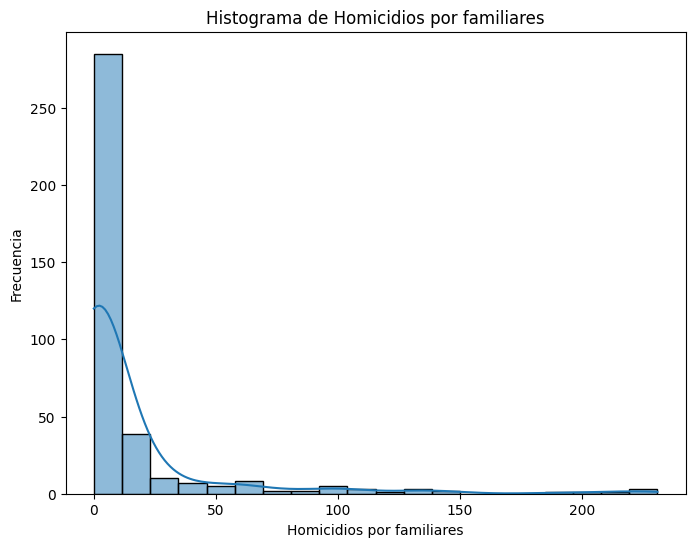

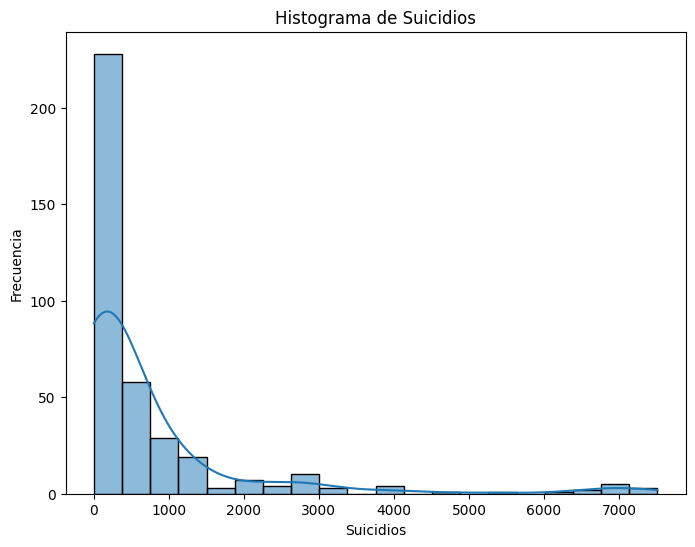

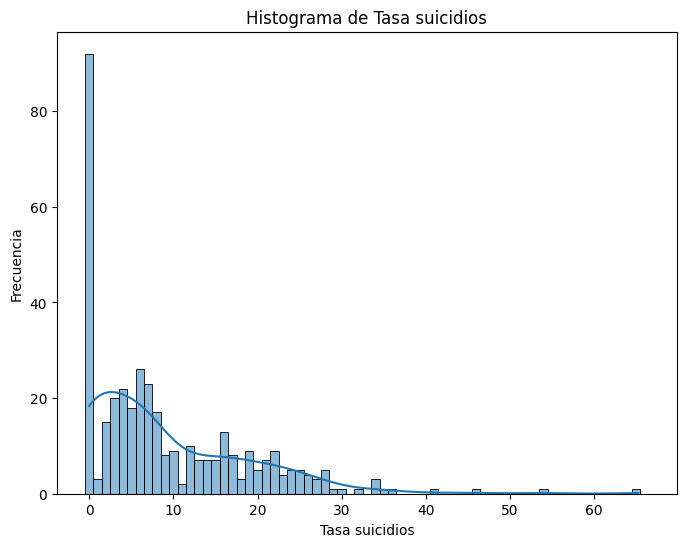

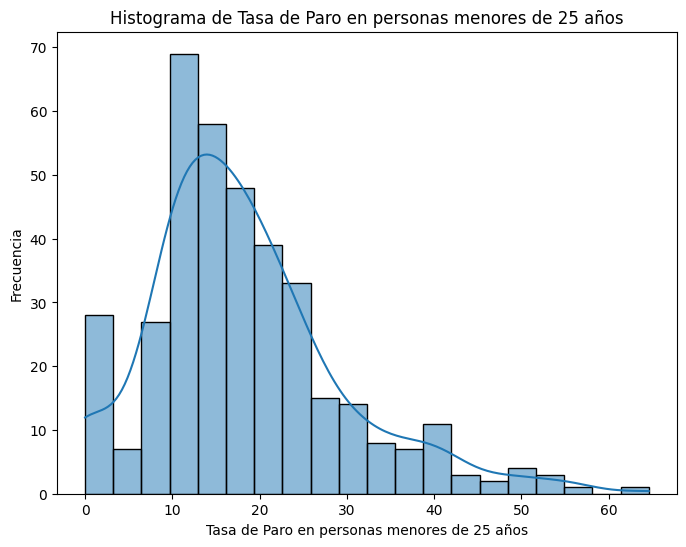

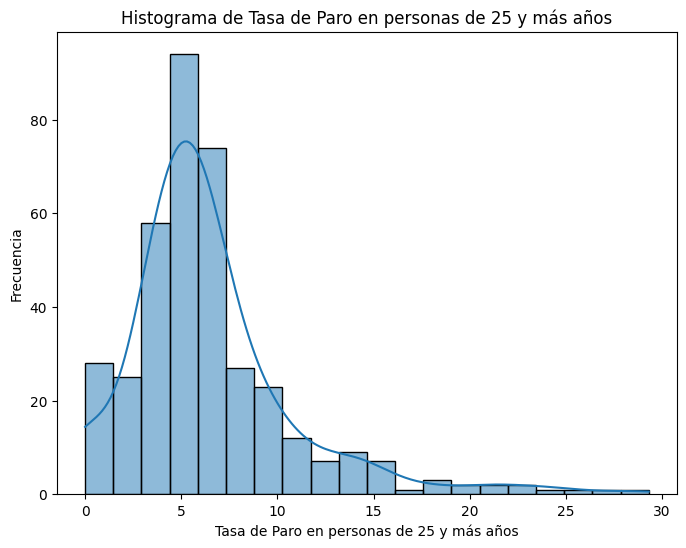

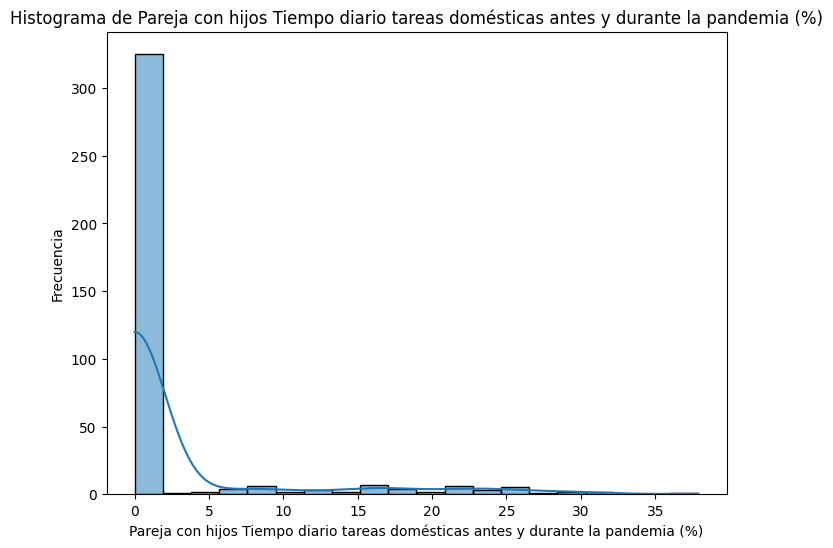

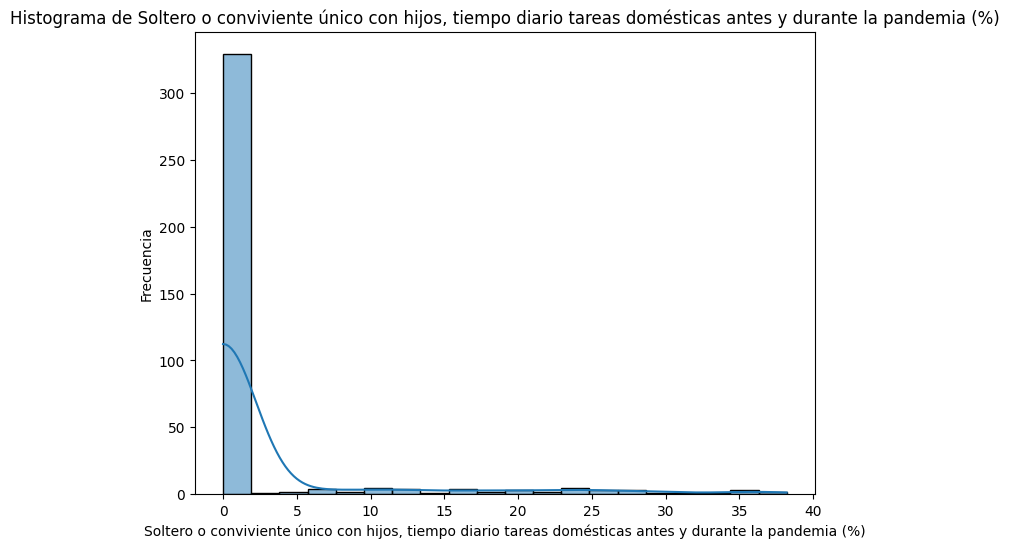

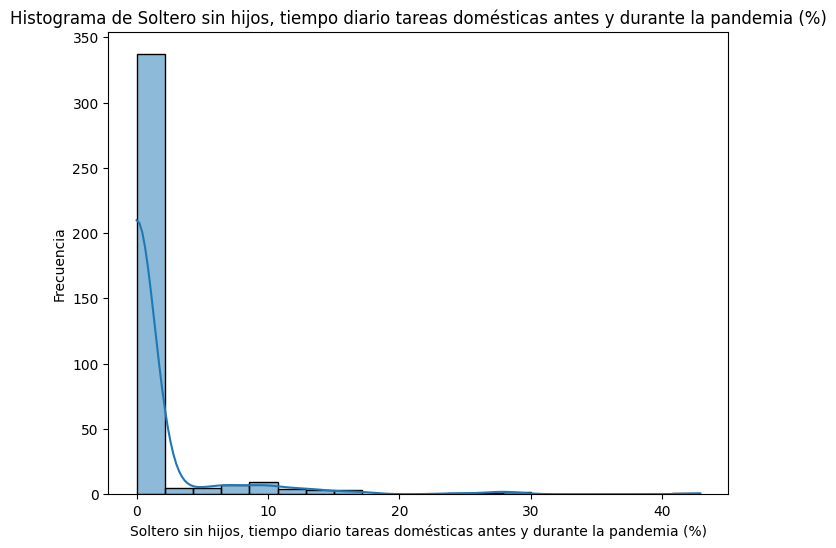

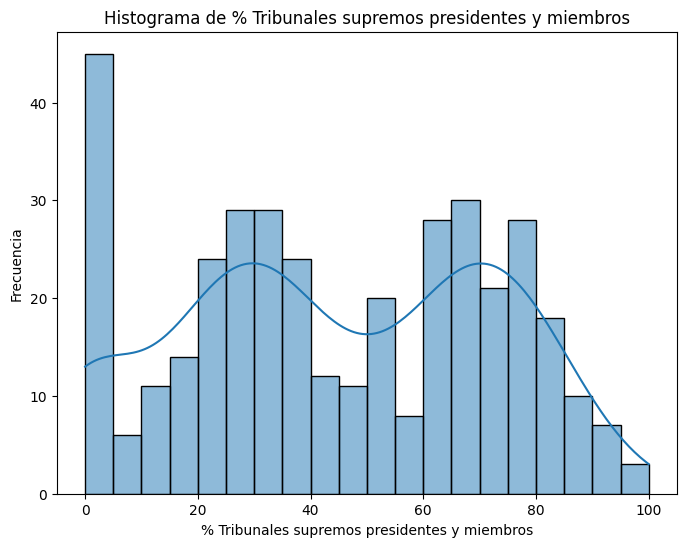

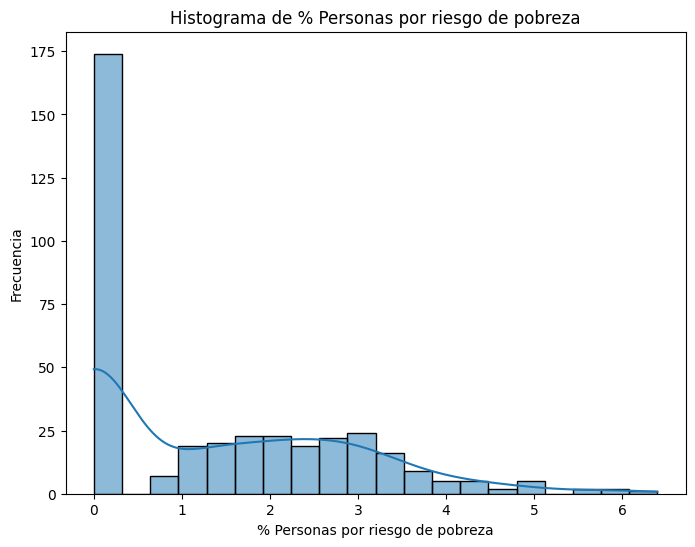

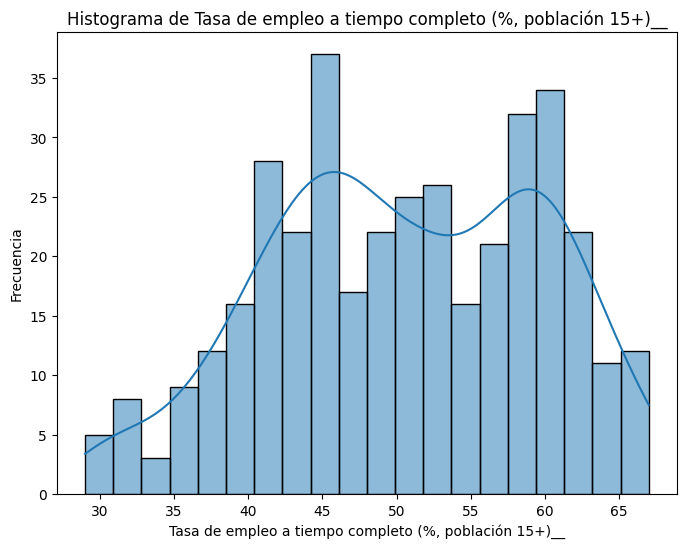

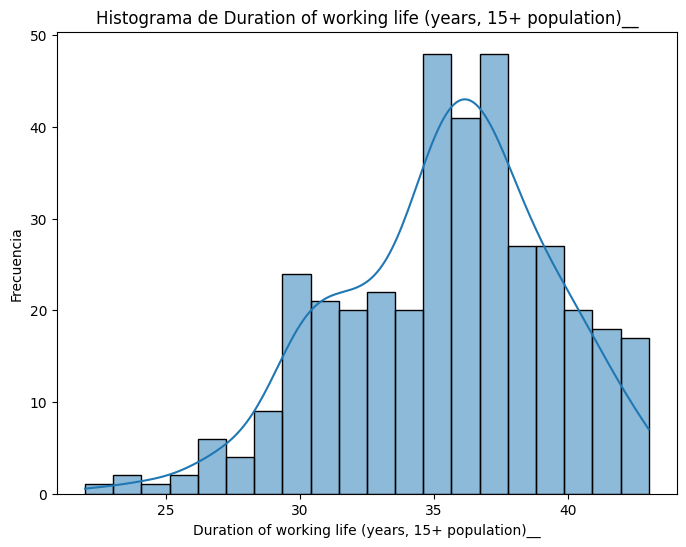

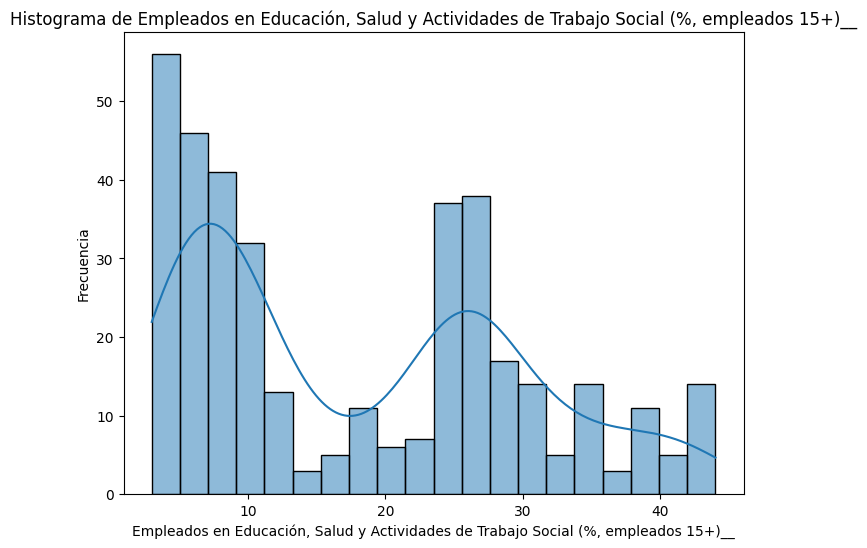

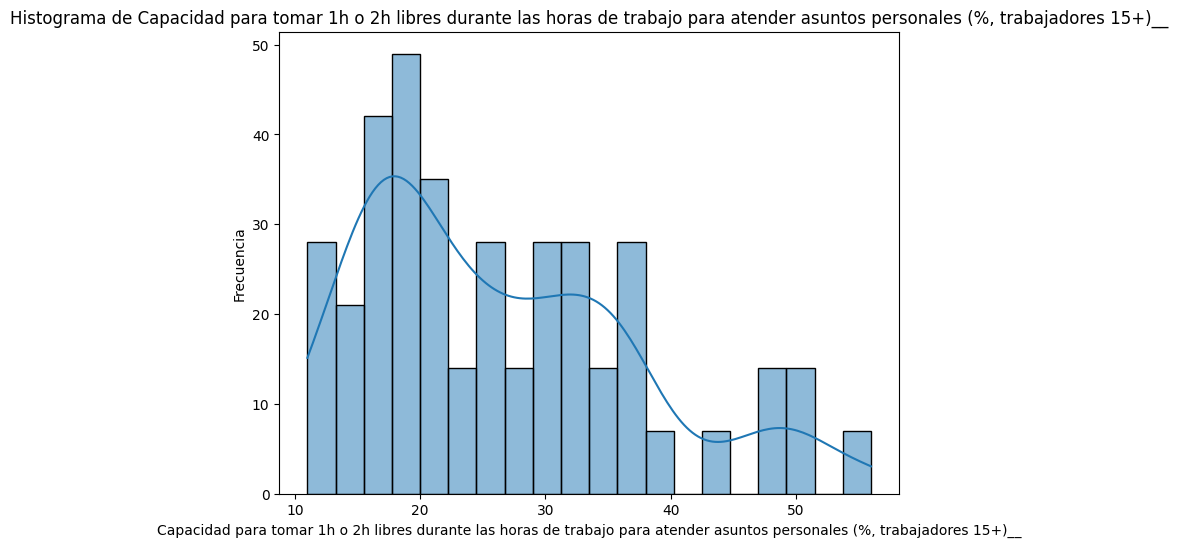

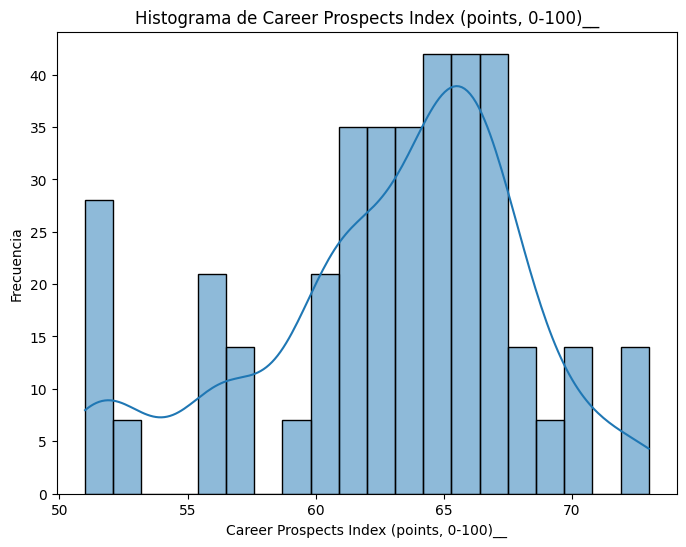

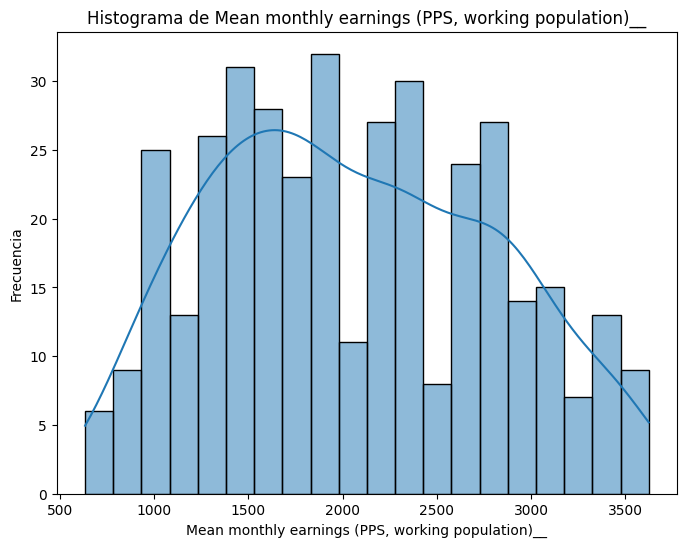

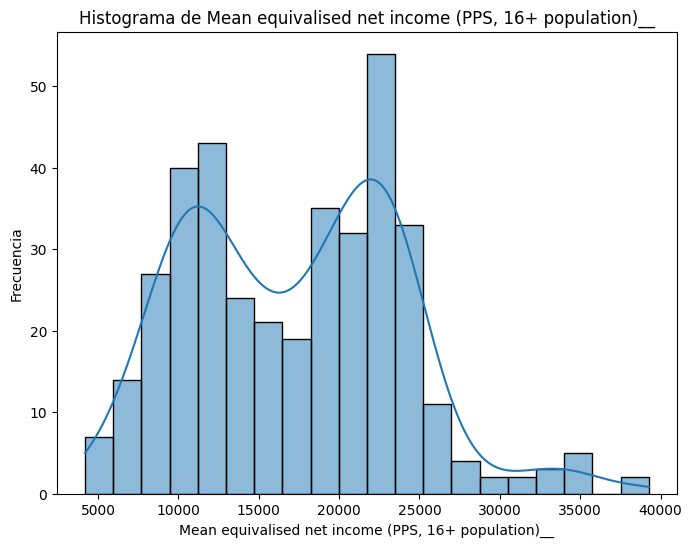

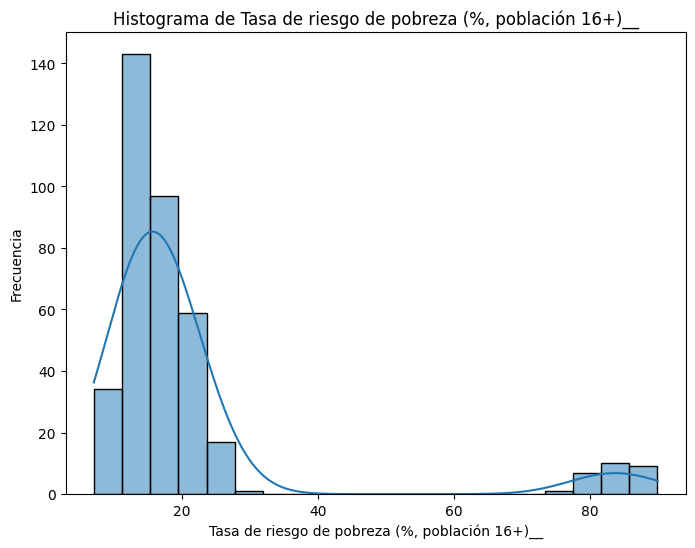

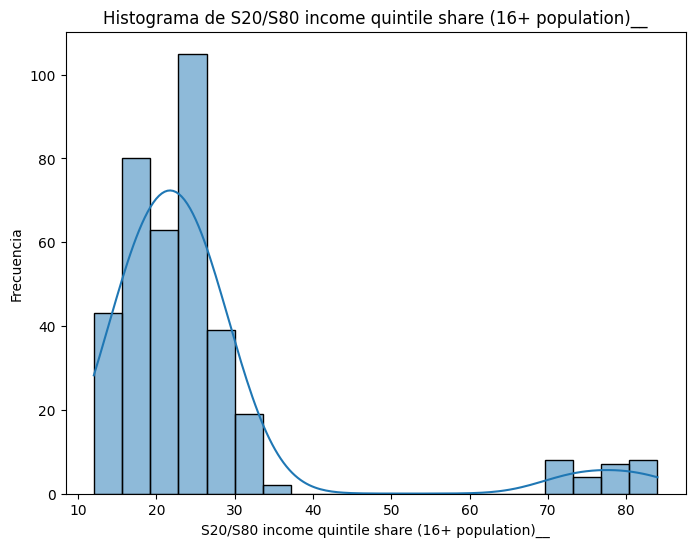

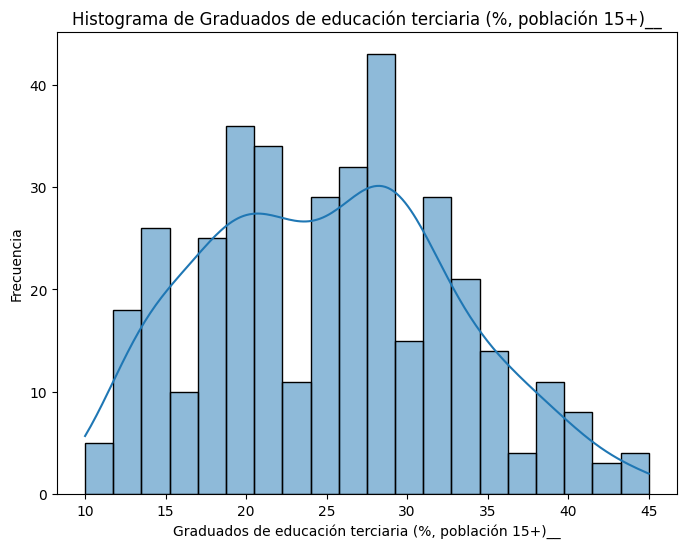

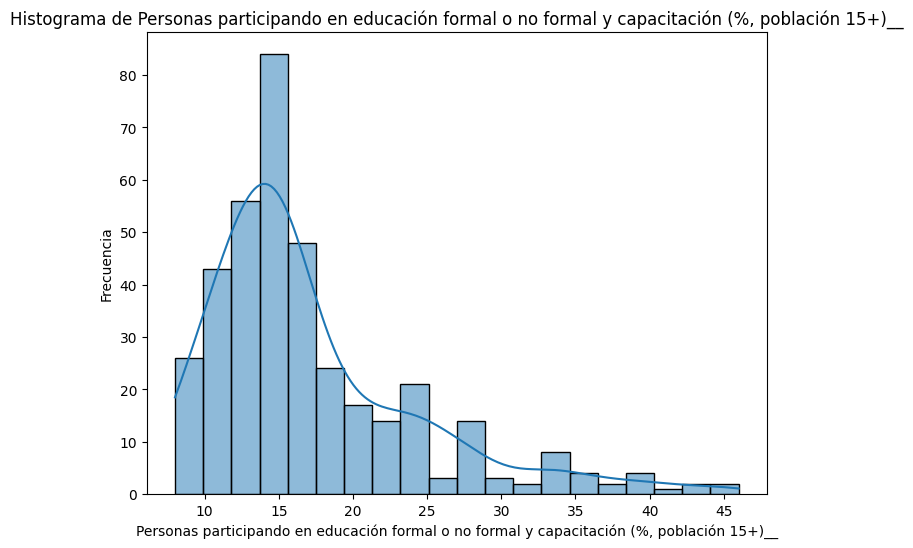

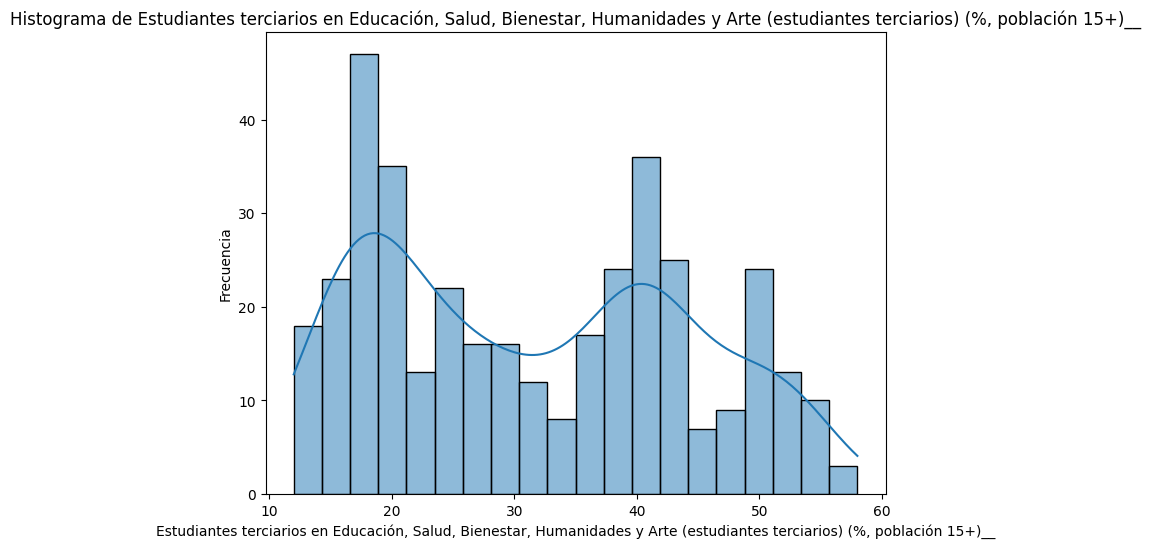

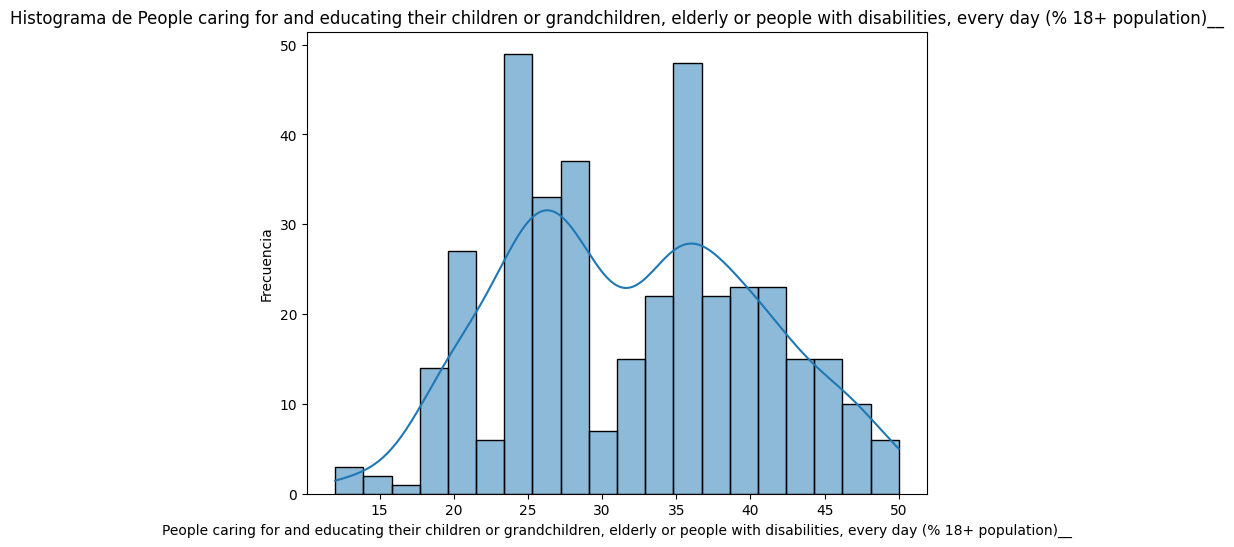

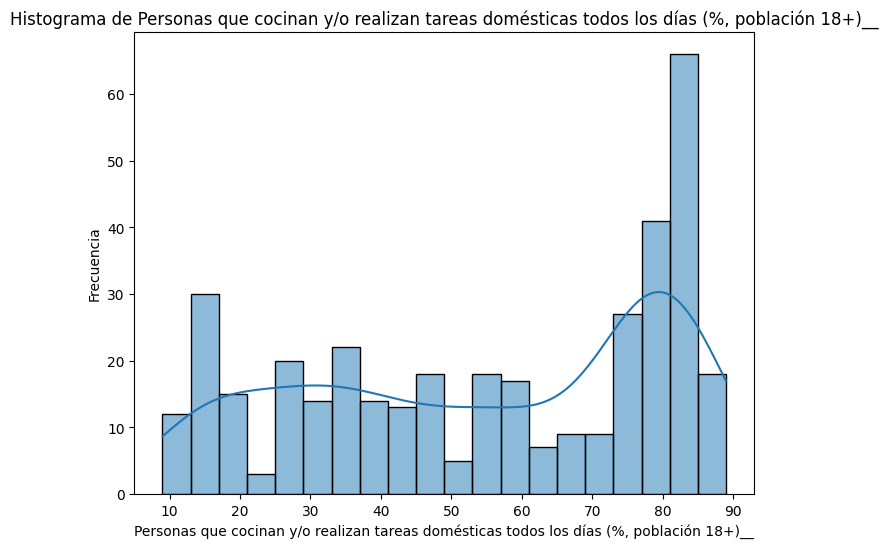

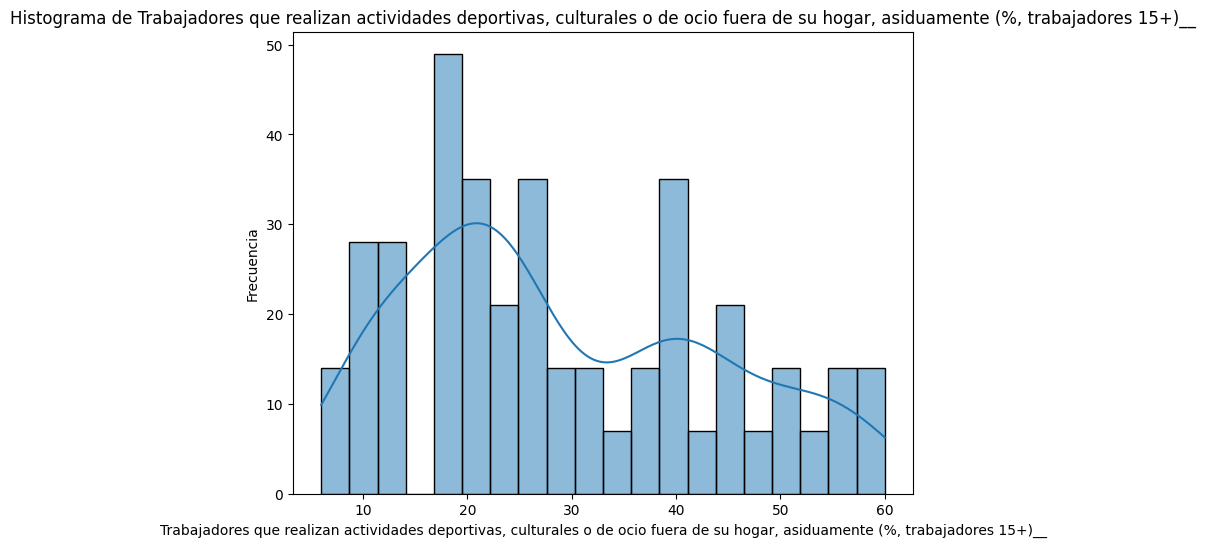

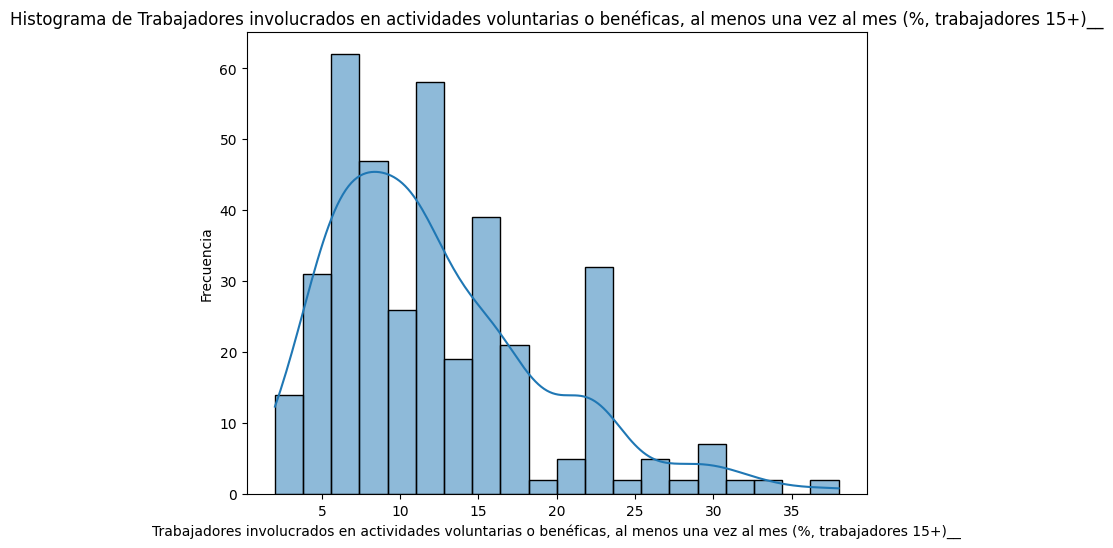

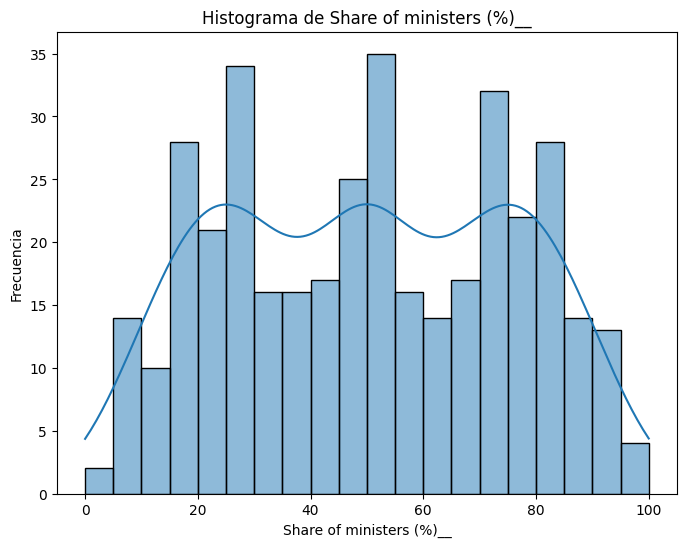

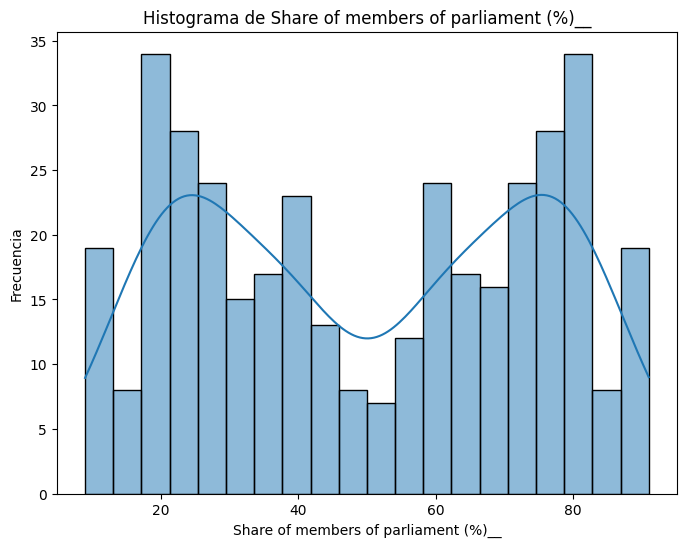

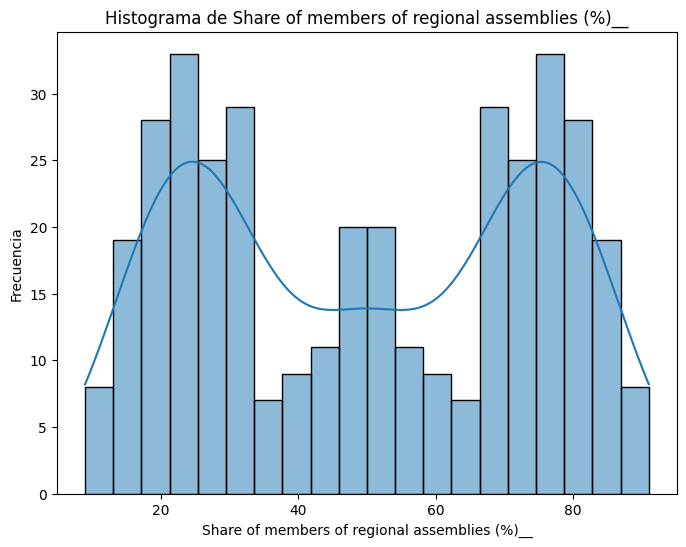

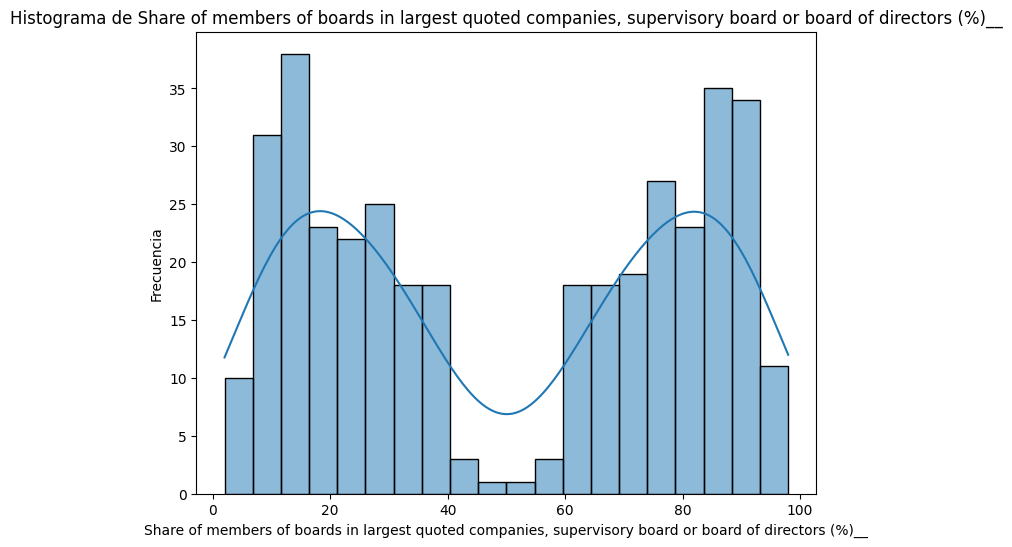

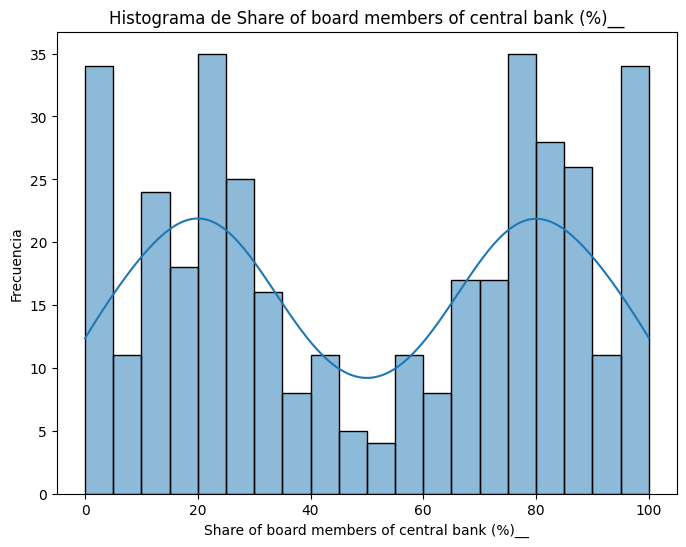

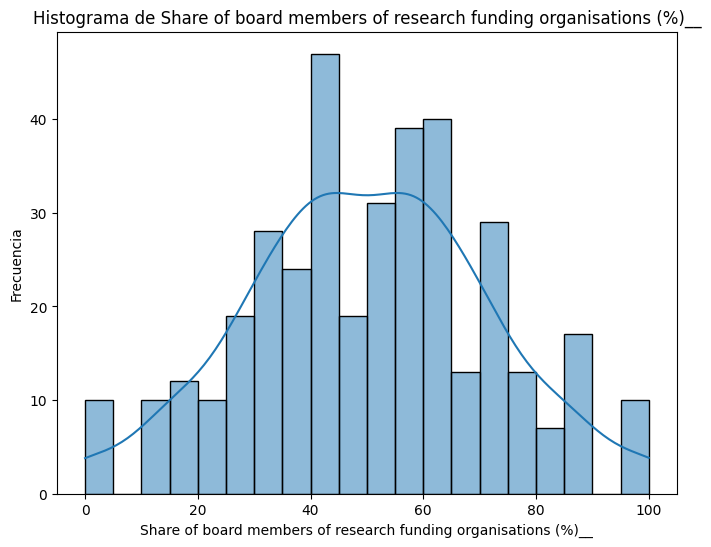

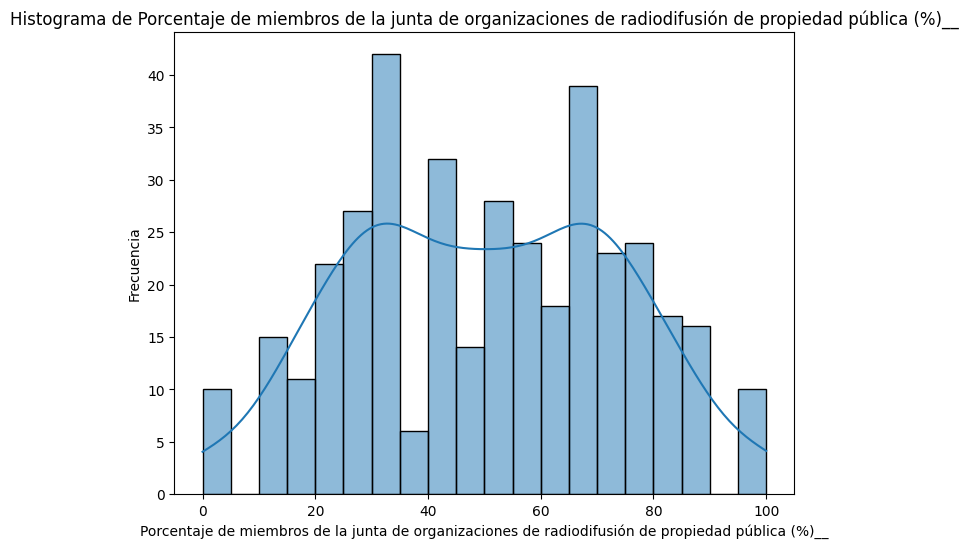

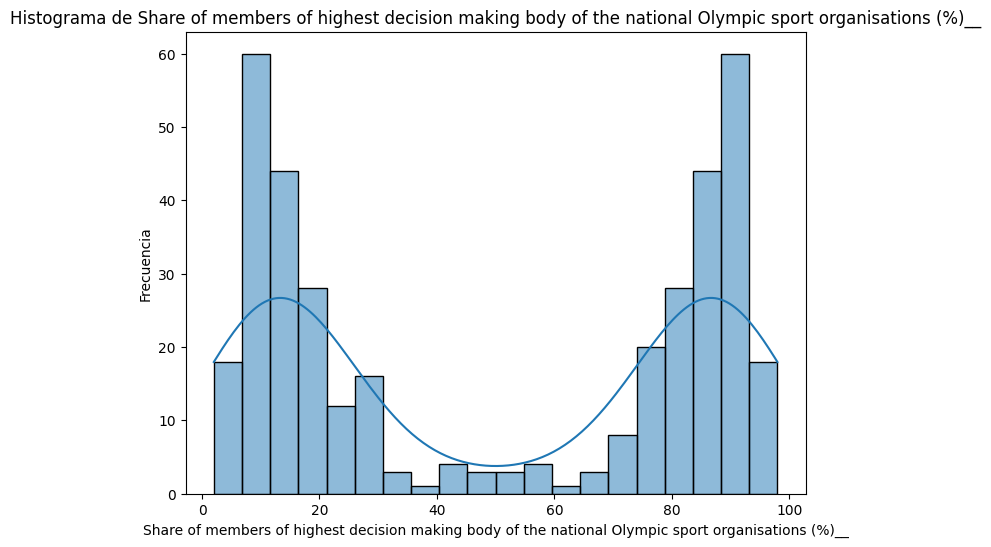

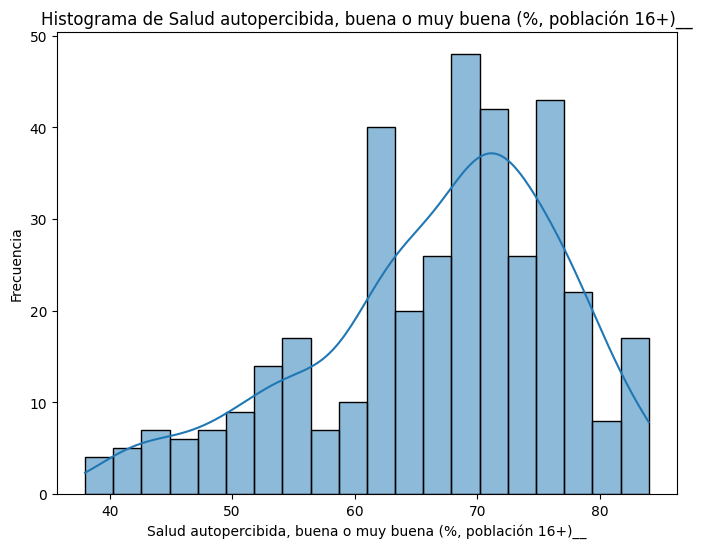

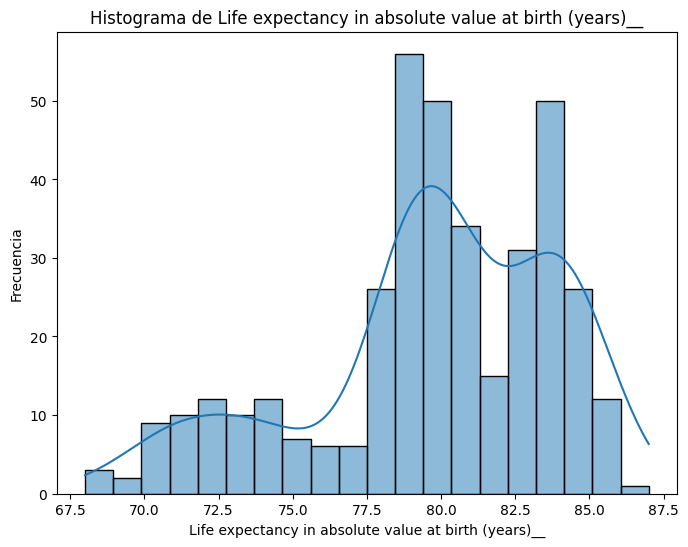

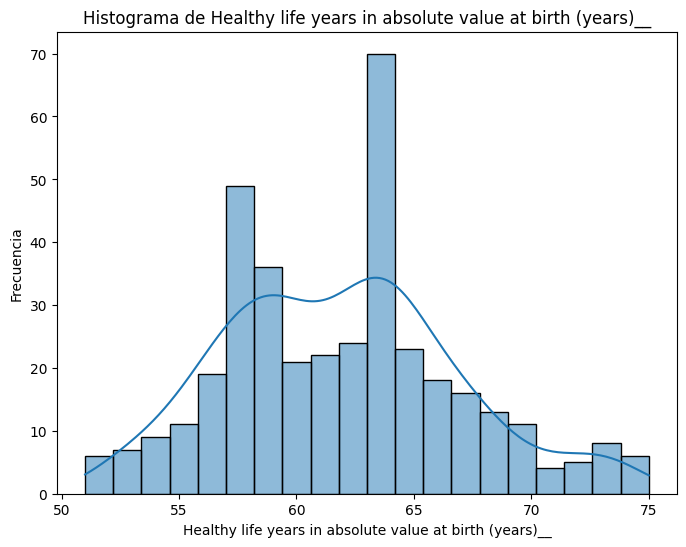

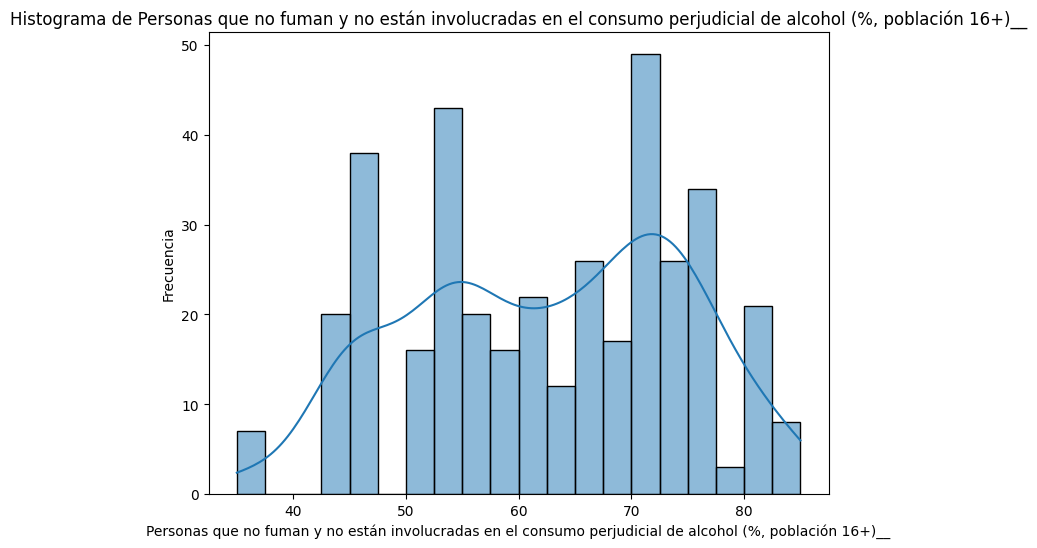

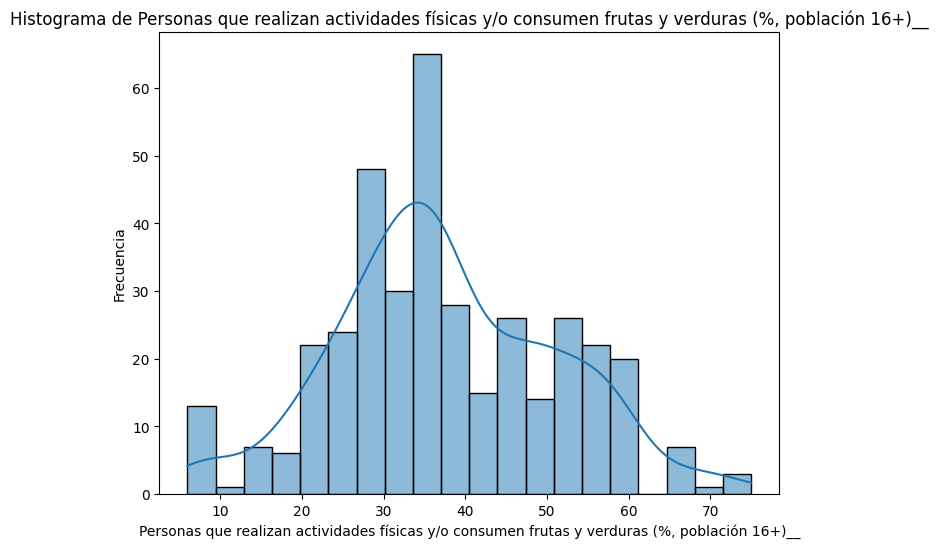

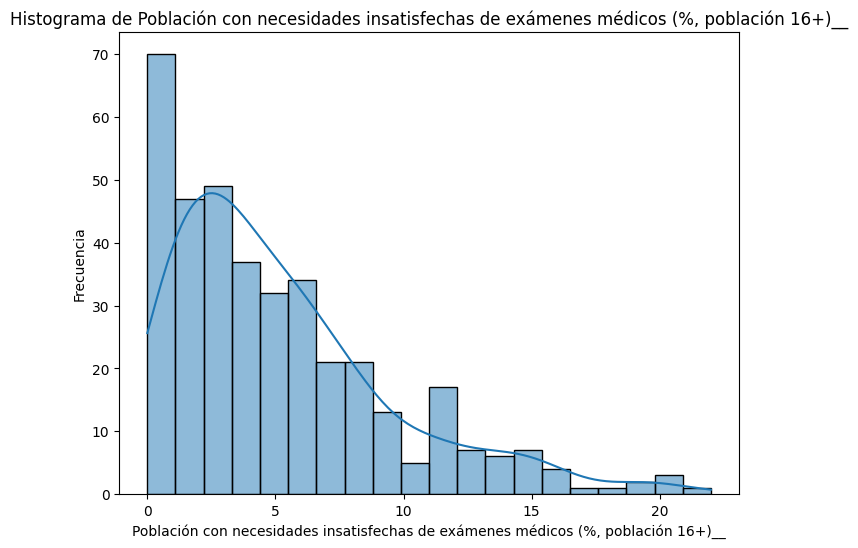

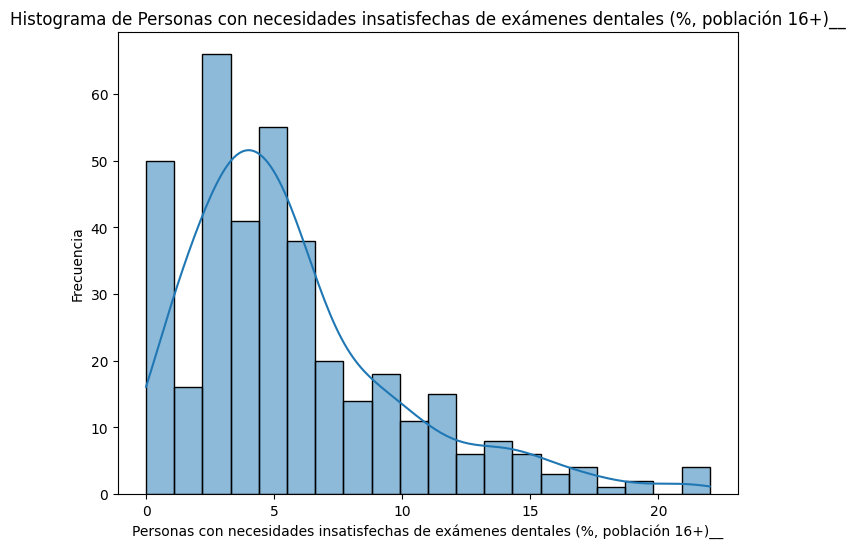

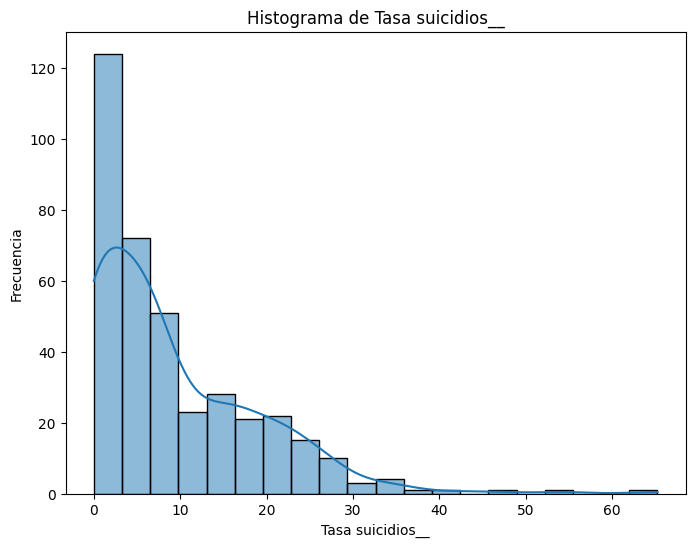

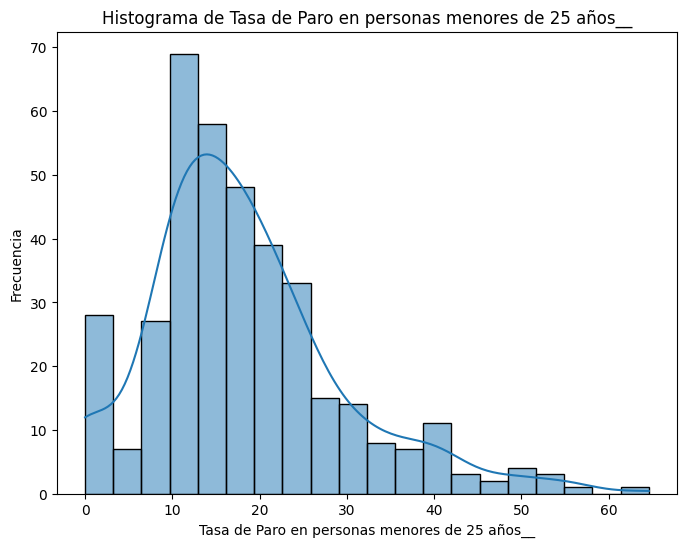

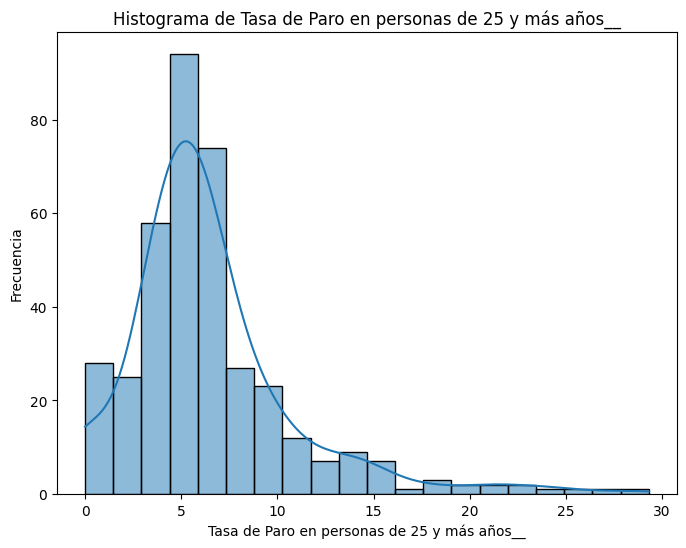

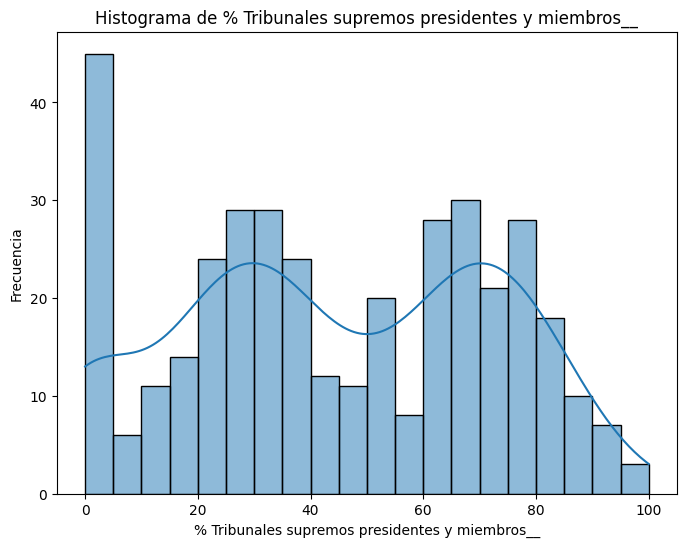

In [ ]:
 #Gráfico de histograma para cada columna
for columna in df:

    plt.figure(figsize=(8, 6))
    sns.histplot(df[columna], bins=20, kde=True)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

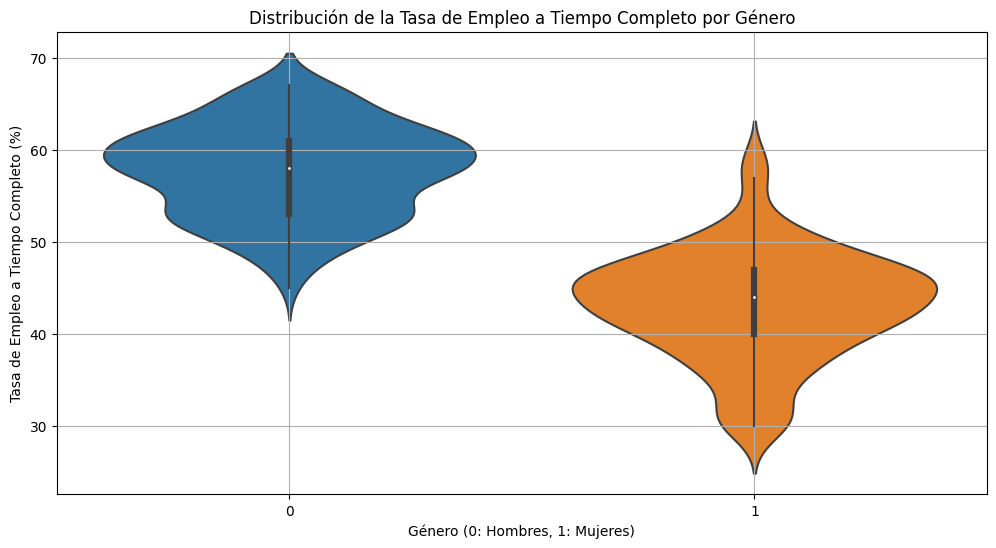

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Género', y='Tasa de empleo a tiempo completo (%, población 15+)', data=df)
plt.title('Distribución de la Tasa de Empleo a Tiempo Completo por Género')
plt.xlabel('Género (0: Hombres, 1: Mujeres)')
plt.ylabel('Tasa de Empleo a Tiempo Completo (%)')
plt.grid(True)
plt.show()


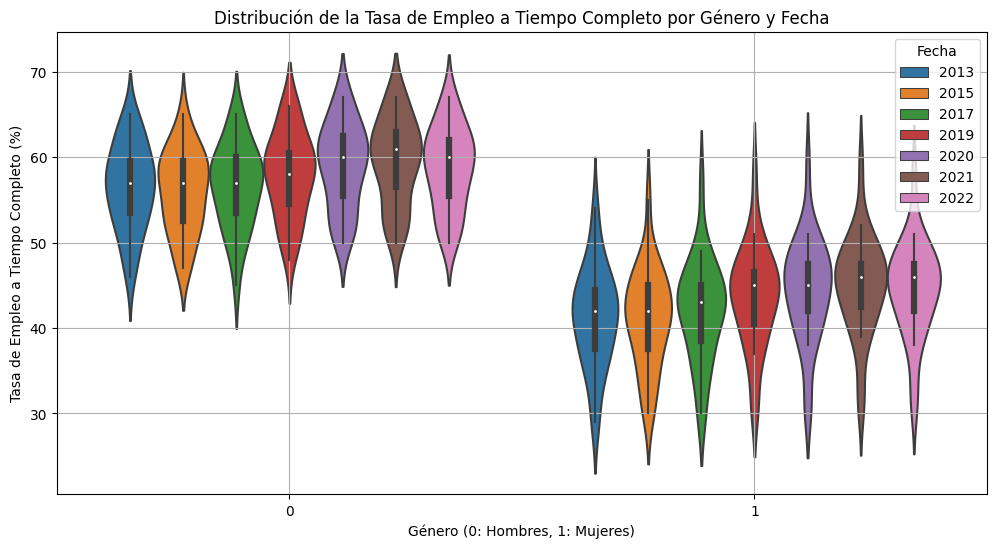

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Género', y='Tasa de empleo a tiempo completo (%, población 15+)', hue='Fecha', data=df)
plt.title('Distribución de la Tasa de Empleo a Tiempo Completo por Género y Fecha')
plt.xlabel('Género (0: Hombres, 1: Mujeres)')
plt.ylabel('Tasa de Empleo a Tiempo Completo (%)')
plt.grid(True)
plt.legend(title='Fecha', loc='upper right')
plt.show()

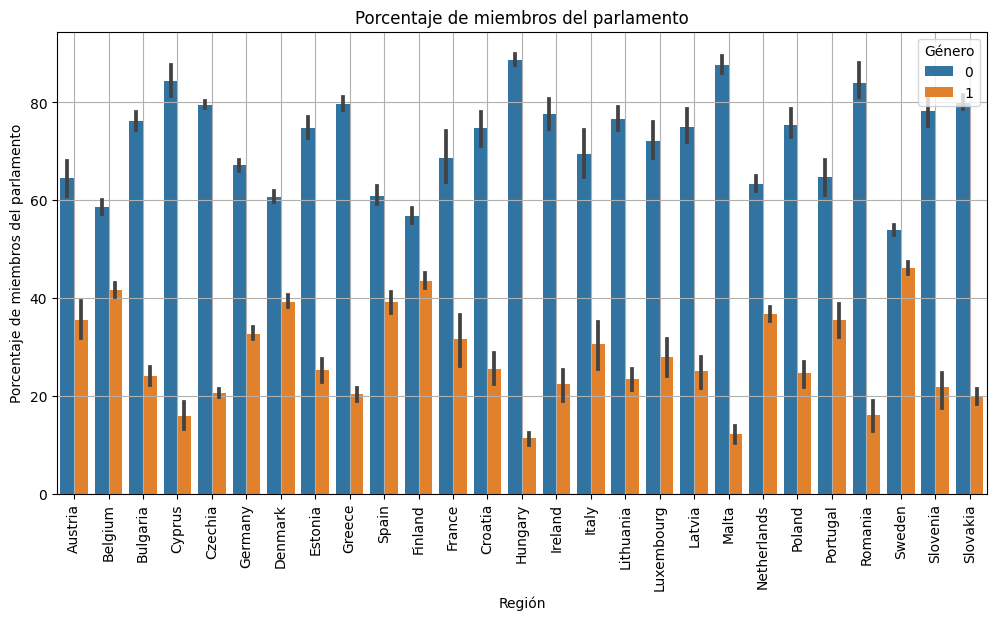

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Share of members of parliament (%)', hue='Género', data=df)
plt.title('Porcentaje de miembros del parlamento')
plt.xlabel('Región')
plt.ylabel('Porcentaje de miembros del parlamento')
plt.xticks(rotation=90)
plt.legend(title='Género', loc='upper right')
plt.grid(True)
plt.show()

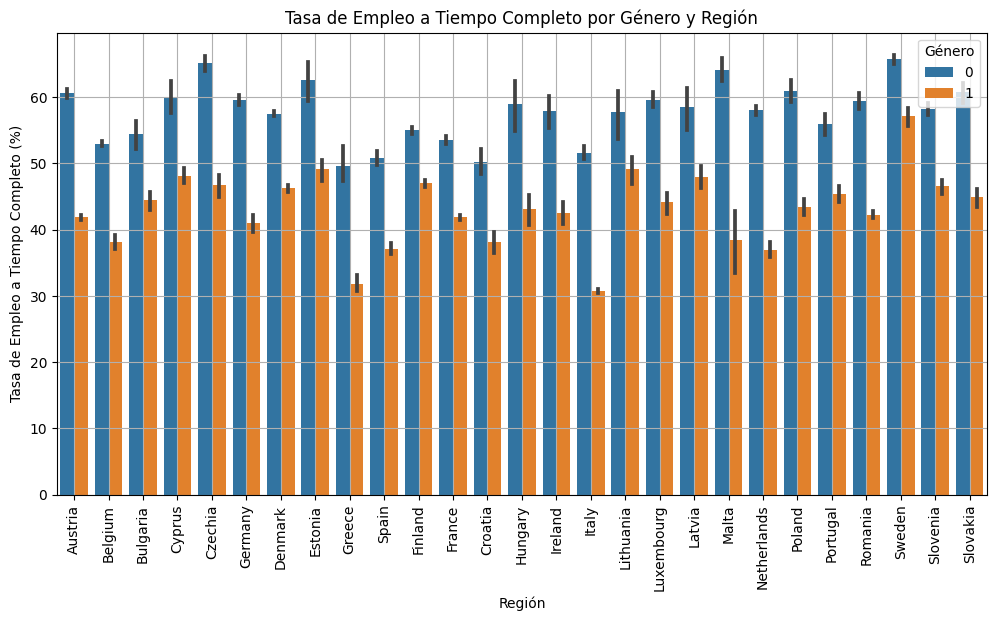

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Tasa de empleo a tiempo completo (%, población 15+)', hue='Género', data=df)
plt.title('Tasa de Empleo a Tiempo Completo por Género y Región')
plt.xlabel('Región')
plt.ylabel('Tasa de Empleo a Tiempo Completo (%)')
plt.xticks(rotation=90)
plt.legend(title='Género', loc='upper right')
plt.grid(True)
plt.show()

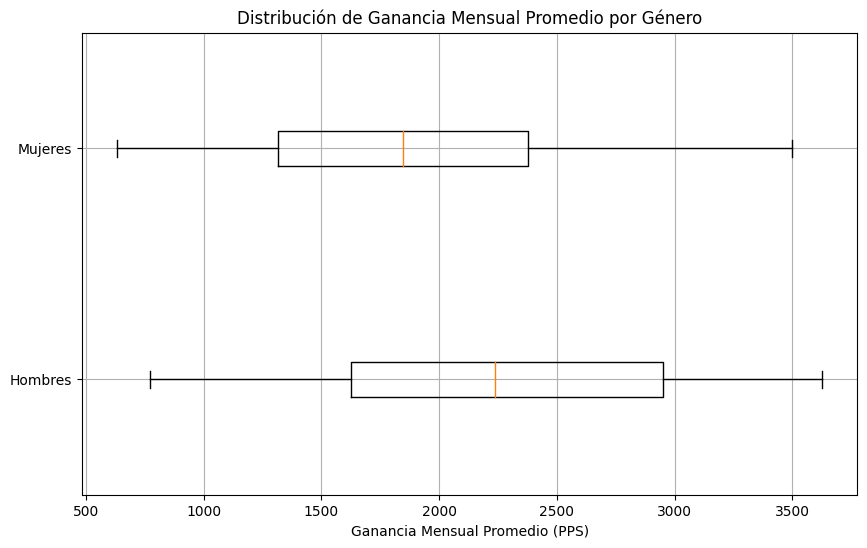

In [ ]:
hombres = df[df['Género'] == 0]['Mean monthly earnings (PPS, working population)']
mujeres = df[df['Género'] == 1]['Mean monthly earnings (PPS, working population)']

plt.figure(figsize=(10, 6))
plt.boxplot([hombres, mujeres], vert=False, labels=['Hombres', 'Mujeres'])
plt.title('Distribución de Ganancia Mensual Promedio por Género')
plt.xlabel('Ganancia Mensual Promedio (PPS)')
plt.grid(True)
plt.show()


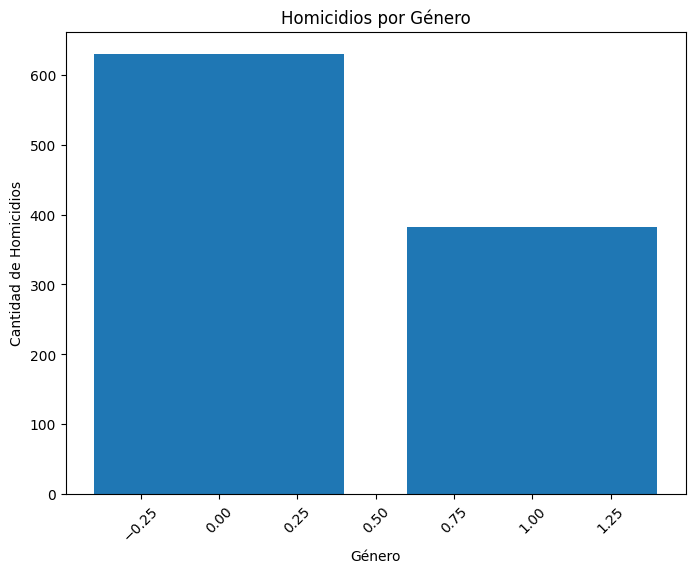

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(df['Género'], df['Homicidios'])
plt.title('Homicidios por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Homicidios')
plt.xticks(rotation=45)
plt.show()

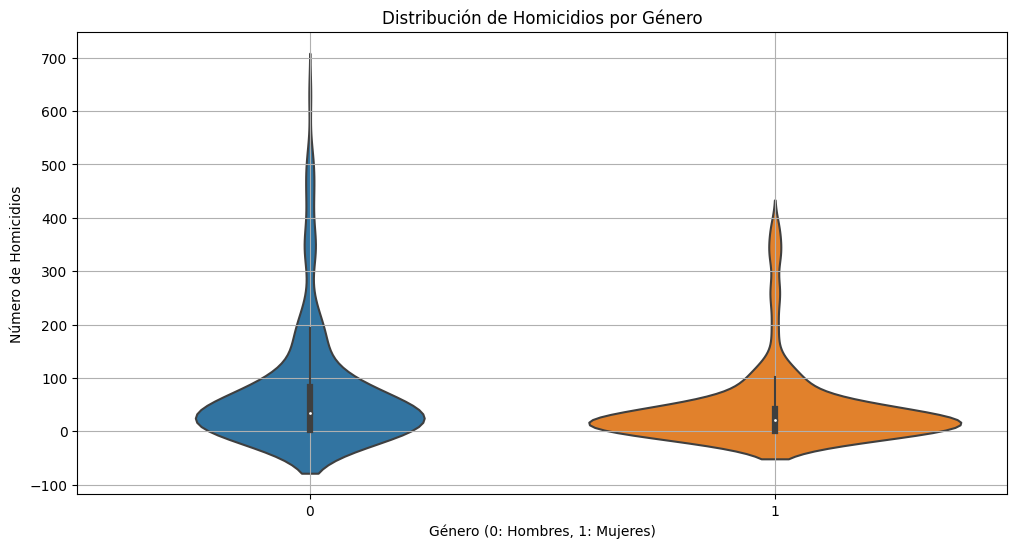

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Género', y='Homicidios', data=df)
plt.title('Distribución de Homicidios por Género')
plt.xlabel('Género (0: Hombres, 1: Mujeres)')
plt.ylabel('Número de Homicidios')
plt.grid(True)
plt.show()

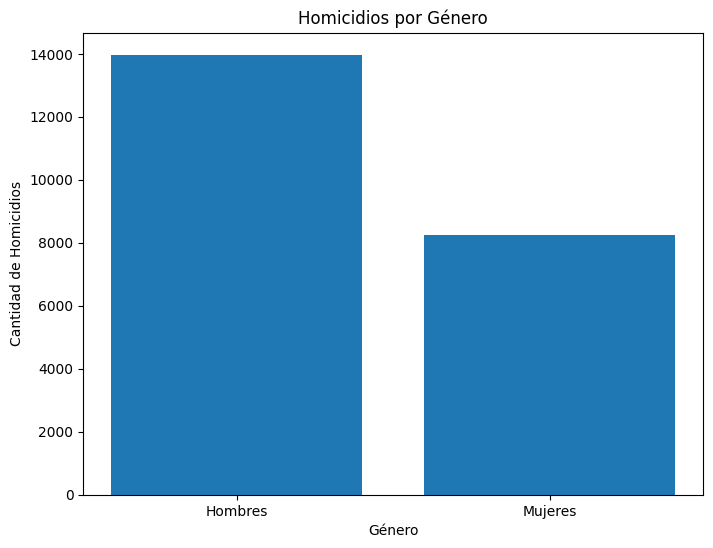

In [ ]:
homicidios_hombres = df[df['Género'] == 0]['Homicidios'].sum()
homicidios_mujeres = df[df['Género'] == 1]['Homicidios'].sum()

plt.figure(figsize=(8, 6))
plt.bar(['Hombres', 'Mujeres'], [homicidios_hombres, homicidios_mujeres])
plt.title('Homicidios por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Homicidios')
plt.show()

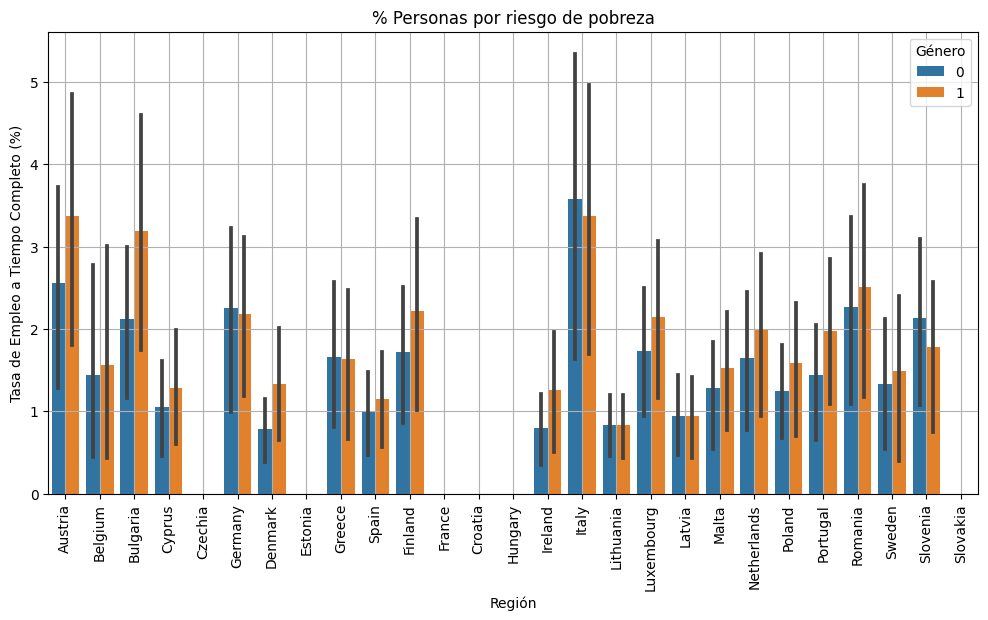

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='% Personas por riesgo de pobreza', hue='Género', data=df)
plt.title('% Personas por riesgo de pobreza')
plt.xlabel('Región')
plt.ylabel('Tasa de Empleo a Tiempo Completo (%)')
plt.xticks(rotation=90)
plt.legend(title='Género', loc='upper right')
plt.grid(True)
plt.show()

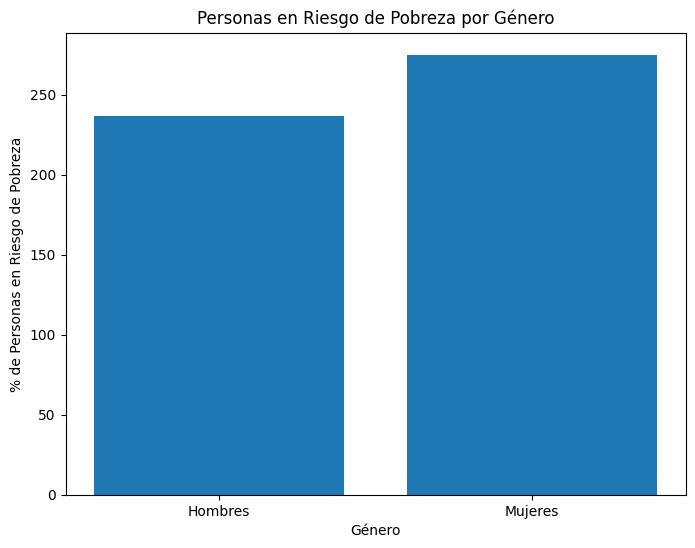

In [ ]:
pobreza_hombres = df[df['Género'] == 0]['% Personas por riesgo de pobreza'].sum()
pobreza_mujeres = df[df['Género'] == 1]['% Personas por riesgo de pobreza'].sum()

plt.figure(figsize=(8, 6))
plt.bar(['Hombres', 'Mujeres'], [pobreza_hombres, pobreza_mujeres])
plt.title('Personas en Riesgo de Pobreza por Género')
plt.xlabel('Género')
plt.ylabel('% de Personas en Riesgo de Pobreza')
plt.show()

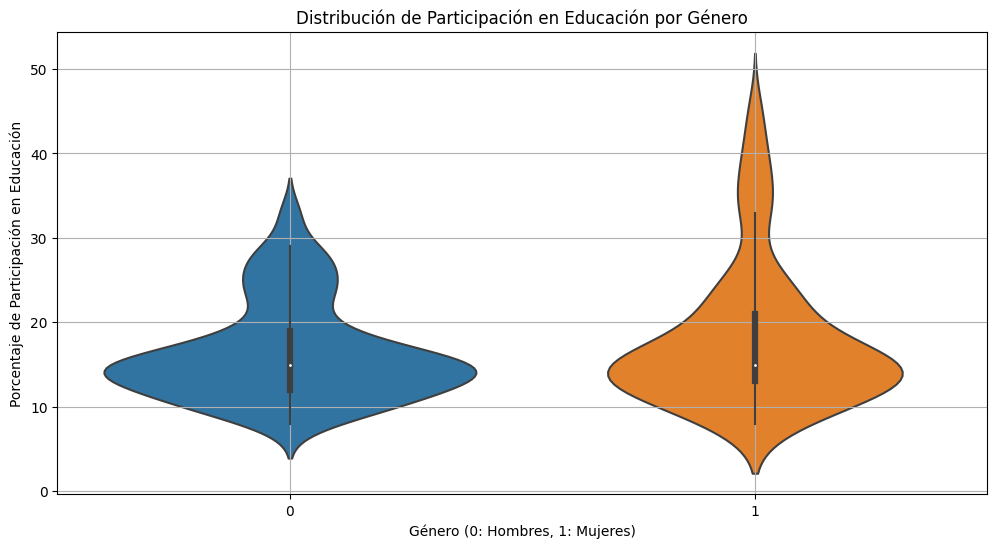

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Género', y='Personas participando en educación formal o no formal y capacitación (%, población 15+)__', data=df)
plt.title('Distribución de Participación en Educación por Género')
plt.xlabel('Género (0: Hombres, 1: Mujeres)')
plt.ylabel('Porcentaje de Participación en Educación')
plt.grid(True)
plt.show()

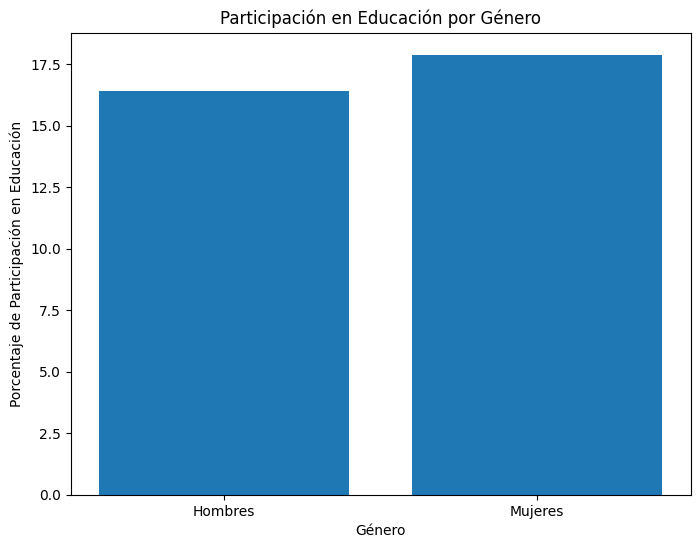

In [ ]:
participacion_educacion_hombres = df[df['Género'] == 0]['Personas participando en educación formal o no formal y capacitación (%, población 15+)__'].mean()
participacion_educacion_mujeres = df[df['Género'] == 1]['Personas participando en educación formal o no formal y capacitación (%, población 15+)__'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Hombres', 'Mujeres'], [participacion_educacion_hombres, participacion_educacion_mujeres])
plt.title('Participación en Educación por Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje de Participación en Educación')
plt.show()

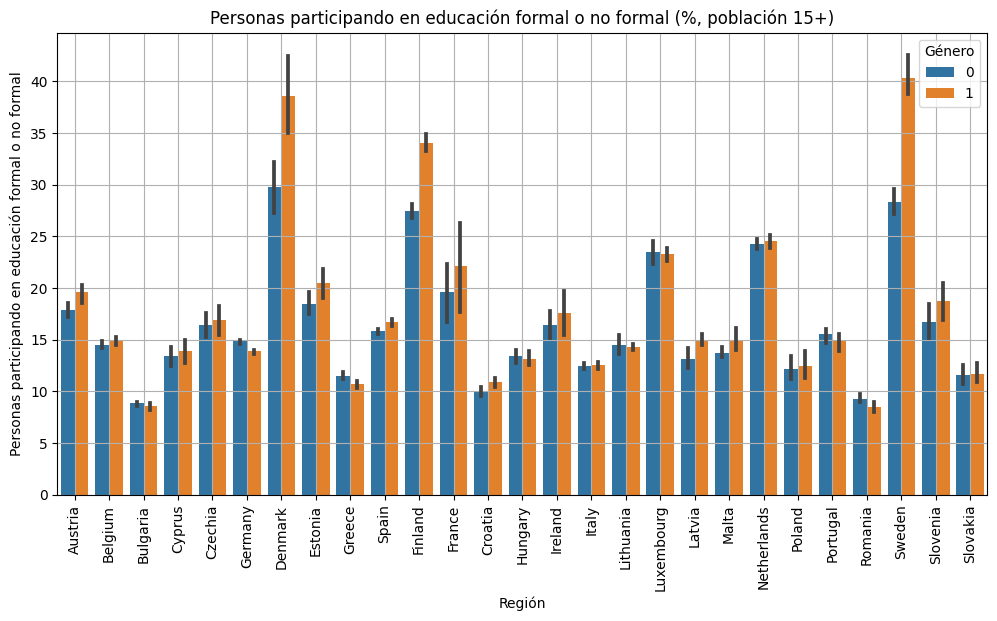

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Personas participando en educación formal o no formal y capacitación (%, población 15+)__', hue='Género', data=df)
plt.title('Personas participando en educación formal o no formal (%, población 15+)')
plt.xlabel('Región')
plt.ylabel('Personas participando en educación formal o no formal')
plt.xticks(rotation=90)
plt.legend(title='Género', loc='upper right')
plt.grid(True)
plt.show()

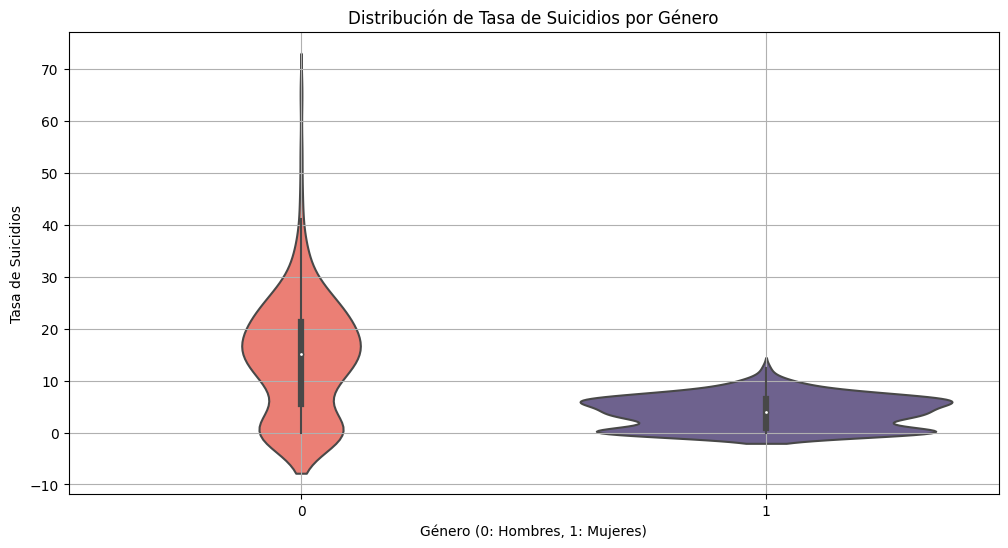

In [ ]:
colores = ["#FF6F61", "#6B5B95"]

plt.figure(figsize=(12, 6))
sns.violinplot(x='Género', y='Tasa suicidios__', data=df, palette=colores)
plt.title('Distribución de Tasa de Suicidios por Género')
plt.xlabel('Género (0: Hombres, 1: Mujeres)')
plt.ylabel('Tasa de Suicidios')
plt.grid(True)
plt.show()

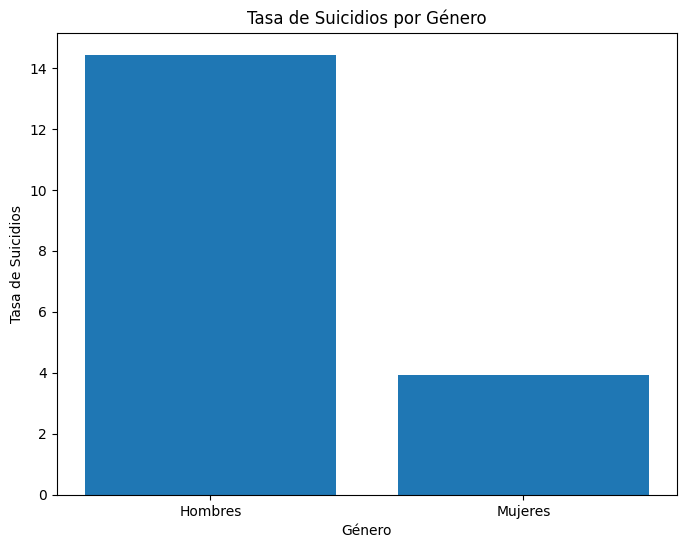

In [ ]:
tasa_suicidios_hombres = df[df['Género'] == 0]['Tasa suicidios__'].mean()
tasa_suicidios_mujeres = df[df['Género'] == 1]['Tasa suicidios__'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Hombres', 'Mujeres'], [tasa_suicidios_hombres, tasa_suicidios_mujeres])
plt.title('Tasa de Suicidios por Género')
plt.xlabel('Género')
plt.ylabel('Tasa de Suicidios')
plt.show()